# Описание проекта ""Определение оптимального тарифа".

В нашем распоряжении имеются данные компании «Мегалайн» о 500 пользователях и их активности за 2018 год.

В рамках проекта мы имеем следующие **данные**:

- информация о пользователях;


- информация о звонках;


- информация о сообщениях;


- информация об интернет-сессиях;


- информация о тарифах.

Также в рамках проекта с помощью исходных данных требуется рассчитать следующие дополнительные **параметры**:

- количество сделанных звонков и израсходованных минут разговора по месяцам;


- количество отправленных сообщений по месяцам;


- объем израсходованного интернет-трафика по месяцам;


- помесячную выручку с каждого пользователя.


**Целью проекта** является определение наиболее рентабельного тарифа из предлагаемых компанией - «Смарт» или «Ультра», а также наиболее значимого с точки зрения формирования дохода региона - Москва или другие регионы.

**Решение**, выработанное в рамках проекта, позволит коммерческому департаменту «Мегалайн» приниять верное управленческое решение о приоритизации эффективного тарифного плана и скорректировать кампании продаж в целях **максимизации прибыли**.

Для этого необходимо:

1. Ответить на следующие **вопросы:**


- Сколько минут разговора требуется пользователям каждого тарифа в месяц?


- Сколько сообщений требуется пользователям каждого тарифа в месяц?


- Какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?


Также необходимо посчитать среднее значение, дисперсию и стандартное отклонение для каждого ответа, а также построить гистограммы и описать распределения.


2. Подтвердить или опровергнуть следующие **гипотезы**:


- средние платежи абонентов тарифов «Ультра» и «Смарт» различаются;


- средние платежи абонентов из Москвы отличаются от средних платежей абонентов из других регионов.


Работу над проектом предлагаю проводить в следующем **порядке**:


1. Чтение данных, их изучение, поиск аномальных и пропущенных значений в данных.


2. Преобразование типов данных, обработка пропущенных и аномальных значений.


3. Расчёт дополнительных параметров.


4. Анализ данных.


5. Построение гипотез и их проверка.

# Этап 1. Чтение данных, их изучение, поиск аномальных и пропущенных значений в данных.

## Этап 1.1. Ипорт библиотек, чтение файлов.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats as st

In [2]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv', index_col = 0)
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

Так как мы Ваш покорный слуга запланировал множество направлений изучения наших наборов данных, целесообразо написать функцию, которая будет принимать на вход исследуемый df, а на выход поставлять различную информацию о нём: первые 10 строк, общая информация, размер, количество пропущенных значений, а также количество уникальных значений.

Отмечу, что большое количество print() здесь лишь для того, чтобы сделать результат работы функции более читаемым, отделяя результаты работы методов друг от друга.

In [3]:
def df_info(df):
    print('Первые 10 строк DF')
    display(df.head(10))
    print('Общая информация о DF')
    print(((df.info())))
    print('Размер df:', df.shape)
    print()
    print('Пропуски в df')
    display(df.isna().sum())
    for col in df.columns:
        print('*** Поле', col + ': уникальные значения ***')
        display(df[col].value_counts())

## Этап 1.2. Исследование df calls.

Исследуем df calls, содержащий информацию о звонках абонентов.

Описание полей calls:

- id — уникальный номер звонка;

- call_date — дата звонка;

- duration — длительность звонка в минутах;

- user_id — идентификатор пользователя, сделавшего звонок.

In [4]:
df_info(calls)

Первые 10 строк DF


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


Общая информация о DF
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None
Размер df: (202607, 4)

Пропуски в df


id           0
call_date    0
duration     0
user_id      0
dtype: int64

*** Поле id: уникальные значения ***


1455_556    1
1352_450    1
1186_85     1
1240_446    1
1045_216    1
           ..
1341_182    1
1176_294    1
1324_513    1
1449_48     1
1388_53     1
Name: id, Length: 202607, dtype: int64

*** Поле call_date: уникальные значения ***


2018-12-31    1435
2018-12-29    1202
2018-12-30    1192
2018-12-22    1158
2018-12-26    1149
              ... 
2018-01-05      20
2018-01-07      18
2018-01-02       9
2018-01-03       7
2018-01-01       5
Name: call_date, Length: 365, dtype: int64

*** Поле duration: уникальные значения ***


0.00     39613
4.49       142
5.50       142
6.15       141
6.38       141
         ...  
27.02        1
26.19        1
25.34        1
27.13        1
24.28        1
Name: duration, Length: 2871, dtype: int64

*** Поле user_id: уникальные значения ***


1377    1760
1168    1692
1375    1560
1453    1440
1196    1240
        ... 
1397      33
1442      28
1373      24
1016      20
1257      14
Name: user_id, Length: 492, dtype: int64

Видим, что в df содержится 202 607 записей. DF имеет следующие типы данных:

- категориальный (2 поля);

- дробное значение (1 поле);

- целочисленное значение (1 поле).

Пропущенные значения в df отсутствуют.

В поле id видим, что каждое значение id звонкак упоминается в df только 1 раз, что хорошо вписывается в картину мира, где каждому звонку присвается отдельный уникальный ID. Аномалий не обнаружено.

В поле call_date видим, что данные лежат аккурат в промежутке между 2018-01-01 и 2018-12-31, что соответствует условию задачи. Аномалий не обнаружено.

В поле duration видим, что в df присутствуют звонки, длительность которых составляет 0 минут, и их доля достаточно велика - 19,55%. Удалять такое количество данных из df будет опрометчиво, поэтому попытаемся что-нибудь сделать с этим полем в ходе предварительной обработки данных.

Поле user_id также ничем примечательным себя не выдаёт, поэтому можно сказать, что и в нём нет аномалий.

## Этап 1.3. Исследование df internet.

Исследуем df internet, содержащий информацию об интернет-сессиях.

Описание полей internet:

- id — уникальный номер сессии;

- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах);

- session_date — дата интернет-сессии;

- user_id — идентификатор пользователя.

In [5]:
df_info(internet)

Первые 10 строк DF


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
5,1000_5,399.97,2018-10-02,1000
6,1000_6,540.08,2018-09-07,1000
7,1000_7,415.70,2018-07-11,1000
8,1000_8,505.40,2018-10-08,1000
9,1000_9,345.54,2018-09-03,1000


Общая информация о DF
<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB
None
Размер df: (149396, 4)

Пропуски в df


id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

*** Поле id: уникальные значения ***


1381_42     1
1011_133    1
1184_57     1
1021_330    1
1312_254    1
           ..
1296_274    1
1024_39     1
1134_377    1
1489_217    1
1385_502    1
Name: id, Length: 149396, dtype: int64

*** Поле mb_used: уникальные значения ***


0.00      19598
197.56        9
447.30        9
335.91        9
108.95        8
          ...  
72.49         1
846.22        1
429.17        1
899.03        1
483.87        1
Name: mb_used, Length: 70003, dtype: int64

*** Поле session_date: уникальные значения ***


2018-12-31    1057
2018-12-30     903
2018-12-25     859
2018-12-26     844
2018-12-22     834
              ... 
2018-01-05      14
2018-01-04       9
2018-01-03       6
2018-01-01       3
2018-01-02       3
Name: session_date, Length: 365, dtype: int64

*** Поле user_id: уникальные значения ***


1496    834
1227    812
1204    789
1240    764
1251    759
       ... 
1151     35
1467     27
1343     26
1192     22
1399      8
Name: user_id, Length: 497, dtype: int64

Видим, что в df содержится 149396 записей. Отмечу, что записей меньше, чем в df calls, однако это может быть связано с тем, что некоторые абоненты могут пользоваться только звонками и не использовать интернет, поэтому с точки зрения суровой реальности телефонии это может не быть предупредительным сигналом к тому, что в df есть проблемы.

DF имеет следующие типы данных:

- категориальный (2 поля);

- дробное значение (1 поле);

- целочисленное значение (2 поля).

Пропущенные значения в df отсутствуют.

Отмечу, в что в df содержится поле unnamed, которое содержит цифру, соответствующую индексу записи в df. О необходимости поля подумаем на этапе предобработки данных, но в блокнотик себе его запишем.

Как и в случае с id звонков в df calls, df internet также имеет поле с id сессии, поэтому также кажется логичным тот факт, что каждое значение id в этом поле встречается лишь один раз - не может быть двух сессий с разными id. Аномалий не обнаружено.

Поле mb_used описывает количество МБ, которые израсходовал абонент в рамках сессии. Аномальными кажутся сессии, в которых абонент израсходовал 0 МБ трафика. Таких сессий у нас 19598 (или порядка 13%), что также довольно критично по отношению к df, поэтому удалять эти аномальные значения из df мы не будем, а попытаемся использовать какую-либо логику при проведении предварительной обработке данных.

Поле user_id, как и в df calls, также ничем примечательным себя не выдаёт, поэтому можно сказать, что в нём нет аномалий.

В поле session_date видим, что данные также лежат в промежутке между 2018-01-01 и 2018-12-31, что соответствует условию задачи. Аномалий не обнаружено.

## Этап 1.4. Исследование df messages.

Исследуем df messages, содержащий информацию о сообщениях.

Описание полей messages:

- id — уникальный номер сообщения;

- message_date — дата сообщения;

- user_id — идентификатор пользователя, отправившего сообщение.

In [6]:
df_info(messages)

Первые 10 строк DF


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


Общая информация о DF
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None
Размер df: (123036, 3)

Пропуски в df


id              0
message_date    0
user_id         0
dtype: int64

*** Поле id: уникальные значения ***


1381_42     1
1134_230    1
1373_50     1
1087_36     1
1277_819    1
           ..
1412_197    1
1425_775    1
1214_115    1
1059_12     1
1369_334    1
Name: id, Length: 123036, dtype: int64

*** Поле message_date: уникальные значения ***


2018-12-31    859
2018-12-30    765
2018-12-21    712
2018-12-29    702
2018-12-26    699
             ... 
2018-01-07     12
2018-01-02     10
2018-01-05     10
2018-01-04     10
2018-01-03      4
Name: message_date, Length: 364, dtype: int64

*** Поле user_id: уникальные значения ***


1277    1463
1089    1408
1231    1384
1385    1380
1356    1224
        ... 
1389       6
1279       5
1074       3
1159       2
1141       1
Name: user_id, Length: 426, dtype: int64

Видим, что в df содержится 123036 записей. Отмечу, что этом df, так же, как и в df internet, записей меньше, чем в df calls, однако это может быть связано с тем, что некоторые абоненты могут не отправлять сообщения, используя только звонки и интернет.

DF имеет следующие типы данных:

- категориальный (2 поля);

- целочисленное значение (2 поля).

Пропущенные значения в df отсутствуют.

Поле id всё так же принимает уникальное значение для каждого уникального сообщения, поле без аномалий.

Поле message_date всё так же лежит в 2018 году, поэтому поле также без аномалий.

Поле user_id по-прежнему ничем не выделяется, поле без аномалий.

## Этап 1.5. Исследование df tariffs.

Исследуем df tariffs, содержащий информацию о тарифах.

Описание полей tariffs:


- tariff_name — название тарифа;

- rub_monthly_fee — ежемесячная абонентская плата в рублях;

- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату;

- messages_included — количество сообщений в месяц, включённых в абонентскую плату;

- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах);

- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата);

- rub_per_message — стоимость отправки сообщения сверх тарифного пакета;

- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта).

In [7]:
df_info(tariffs)

Первые 10 строк DF


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Общая информация о DF
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None
Размер df: (2, 8)

Пропуски в df


messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

*** Поле messages_included: уникальные значения ***


50      1
1000    1
Name: messages_included, dtype: int64

*** Поле mb_per_month_included: уникальные значения ***


30720    1
15360    1
Name: mb_per_month_included, dtype: int64

*** Поле minutes_included: уникальные значения ***


3000    1
500     1
Name: minutes_included, dtype: int64

*** Поле rub_monthly_fee: уникальные значения ***


550     1
1950    1
Name: rub_monthly_fee, dtype: int64

*** Поле rub_per_gb: уникальные значения ***


150    1
200    1
Name: rub_per_gb, dtype: int64

*** Поле rub_per_message: уникальные значения ***


3    1
1    1
Name: rub_per_message, dtype: int64

*** Поле rub_per_minute: уникальные значения ***


3    1
1    1
Name: rub_per_minute, dtype: int64

*** Поле tariff_name: уникальные значения ***


ultra    1
smart    1
Name: tariff_name, dtype: int64

Видим, что в df содержится всего 2 записи, что является абсолютно справедливым, так как у компании только 2 тарифа. 

DF имеет следующие типы данных:

- категориальный (1 поле);

- целочисленное значение (7 полей).

Пропущенных значений в df нет.

Учитывая, что каждое поле содержит только 2 записи, соответствующее 2 тарифным планам, а также отсутствие в df пропусков, можно заключить, что аномальные поля в df также отсутствуют.

## Этап 1.6. Исследование df users.

Исследуем df users, содержащий информацию о пользователях.

Описание полей users:


- user_id — уникальный идентификатор пользователя;

- first_name — имя пользователя;

- last_name — фамилия пользователя;

- age — возраст пользователя (годы);

- reg_date — дата подключения тарифа (день, месяц, год);

- churn_date — дата прекращения пользования тарифом;

- city — город проживания пользователя;

- tariff — название тарифного плана.

In [8]:
df_info(users)

Первые 10 строк DF


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


Общая информация о DF
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None
Размер df: (500, 8)

Пропуски в df


user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

*** Поле user_id: уникальные значения ***


1023    1
1194    1
1181    1
1182    1
1183    1
       ..
1362    1
1363    1
1364    1
1365    1
1024    1
Name: user_id, Length: 500, dtype: int64

*** Поле age: уникальные значения ***


53    14
42    14
63    13
71    13
64    13
73    12
21    12
40    12
39    11
47    11
29    11
26    11
37    11
41    10
36    10
58    10
45    10
70    10
52    10
51     9
27     9
48     9
50     9
28     9
30     9
24     9
20     9
19     9
56     9
23     9
68     9
66     9
65     9
69     8
62     8
60     8
44     8
55     8
25     7
43     7
67     7
35     7
74     7
32     7
31     7
46     7
75     6
54     6
59     6
18     6
33     5
34     5
38     5
22     5
72     5
49     4
57     4
61     3
Name: age, dtype: int64

*** Поле churn_date: уникальные значения ***


2018-12-21    2
2018-12-09    2
2018-12-03    2
2018-10-03    2
2018-10-14    2
2018-12-16    1
2018-12-20    1
2018-12-25    1
2018-11-07    1
2018-12-26    1
2018-12-14    1
2018-10-25    1
2018-09-26    1
2018-10-05    1
2018-11-22    1
2018-12-24    1
2018-11-27    1
2018-12-30    1
2018-10-27    1
2018-09-02    1
2018-11-21    1
2018-09-27    1
2018-11-26    1
2018-08-17    1
2018-12-23    1
2018-10-28    1
2018-08-31    1
2018-12-18    1
2018-11-16    1
2018-11-30    1
2018-10-04    1
2018-12-11    1
2018-11-13    1
Name: churn_date, dtype: int64

*** Поле city: уникальные значения ***


Москва             99
Санкт-Петербург    39
Новосибирск        16
Омск               14
Казань             14
                   ..
Химки               1
Нижневартовск       1
Иваново             1
Архангельск         1
Подольск            1
Name: city, Length: 76, dtype: int64

*** Поле first_name: уникальные значения ***


Радим       6
Леонид      5
Пётр        5
Клавдия     4
Адам        4
           ..
Рафаэль     1
Трифон      1
Георгина    1
Эльза       1
Лариса      1
Name: first_name, Length: 246, dtype: int64

*** Поле last_name: уникальные значения ***


Андреенко     5
Озерова       3
Соловьев      3
Абашкина      3
Березина      3
             ..
Костин        1
Акимычева     1
Аракина       1
Прокофьева    1
Демидов       1
Name: last_name, Length: 419, dtype: int64

*** Поле reg_date: уникальные значения ***


2018-05-28    8
2018-11-16    5
2018-04-03    5
2018-10-05    5
2018-01-04    5
             ..
2018-07-25    1
2018-09-05    1
2018-05-22    1
2018-11-27    1
2018-12-30    1
Name: reg_date, Length: 270, dtype: int64

*** Поле tariff: уникальные значения ***


smart    351
ultra    149
Name: tariff, dtype: int64

Видим, что в df, за исключением поля reg_date, содержится 500 записей, что также соответствует условию проекта в части размера абонентской базы в 500 клиентов.

DF имеет следующие типы данных:

- категориальный (6 поле);

- целочисленное значение (1 поле).

Пропущенные значения имеются только в поле churn_date, которое описывает дату подключения тарифа. Очевидно, что если значение в этом поле пропущено, то тариф ещё действовал на момент выгрузки данных. Следовательно, у абонентов, для которых поле churn_date не заполнено, на момент формирования выборки есть действующий тариф, а абоненты, у которых данное поле заполнено, прекратили пользоваться тарифным планом и больше не являются клиентами компании.

В остальном для данных этого df характерны особенности предыдущих df в части полей churn_date, user_id, reg_date. Поля, описывающие сущность абонента - имя, отчество, город - также не содержат каких-либо видимых аномалий.

## Выводы по этапу 1.

В рамках данного этапа были прочитаны предложенные наборы данных, а также произведено их первичное исследование: изучены первые 10 записей в каждом df, получена общая информация о df и информация о его размерах, посчитано количество пропущенных значений в каждом поле df, а также изучены уникальные записи в каждом поле исследуемого df.

Для автоматизации исследовательского процесса была написана соответствующая функция.

В качестве наиболее важных результатов исследования можно отметить:

1. Аномальные значения поля duration в df calls: поле описывает длительность звонка в минутах, и для 39613 звонков их длительность составляет 0 минут. 


2. Аномальные значения поля mb_used в df internet: поле описывает количество МБ, израсходованных за одну интернет-сессию, и для 19598 интернет-сессий количество израсходованных МБ равняется 0. 


3. Пропущенные значения в поле churn_date в df users: поле описывает дату отключения абонента от тарифа, и для 462 абонентов это поле не заполнено. Исходя из семантического смысла поля, можно заключить, что пропуски в этом поле не являются проблемным значением, так как такие абоненты не отключали свои тарифы на момент формирования наборов данных.


4. Данные в полях duration и mb_used в df calls и internet соответственно дают количественную характеристику интенсивности использования абонентами своих тарифов в части звонков и сообщений, при этом даннные в этих полях представлены в виде десятичной дроби (тип данных float). Однако на практике удобнее говорить о таких вещах, когда они сведены к целому значению. Например, абонент за месяц израсходовал 350 минут и 500 МБ интернета, а не 349.78 минут и 499.57 МБ соответственно. Поэтому логичным кажется преобразование этих полей в целочисленное значение с типом данных int.


5. Данные поля call_date в df calls, поля session_date в df internet, поля message_date в df messages, полей churn_date и reg_date в df users приведены в типе str, хотя семантически отражают дату того или иного события. Поэтому их нужно преобразовать в формат datetime.

# Этап 2. Преобразование типов данных, обработка пропущенных и аномальных значений, обогащание данных.

В рамках данного Этапа будут проведены следующие мероприятия:

1. Преобразование типов данных.

2. Обработка пропущенных значений (поле churn_date в df users).

3. Обработка аномальных значений (поле duration в df calls и поле mb_used в df internet).

4. Работа с непонятным полем Unnamed: 0 в df internet.

## Этап 2.1. Преобразование типов данных.

В рамках данного этапа будут преобразованы следующие поля:

1. Поле duration в df calls.


2. Поле mb_used в df internet.


3. Поле call_date в df calls.


4. Поле session_date в df internet.


5. Поле message_date в df messages.


6. Поля churn_date и reg_date в df users.

Данные в полях duration и mb_used в df calls и internet соответственно дают количественную характеристику интенсивности использования абонентами своих тарифов в части звонков и сообщений, при этом даннные в этих полях представлены в виде десятичной дроби (тип данных float). Однако на практике удобнее говорить о таких вещах, когда они сведены к целому значению. Например, абонент за месяц израсходовал 350 минут и 500 МБ интернета, а не 349.78 минут и 499.57 МБ соответственно.

Поэтому логичным кажется преобразование этих полей в целочисленное значение с типом данных int.

Для округления в большую сторону используем метод ceil из библиотеки math.

Напишем функцию. На вход функция принимает значение из поля преобразовываемого df, на выходе функция возвращает в это поле округлённое вверх значение.

In [9]:
calls['duration'] = calls['duration'].apply(math.ceil)
internet['mb_used'] = internet['mb_used'].apply(math.ceil)

Проверим, корректно ли осуществлено преобразование.

In [10]:
calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000
5,1000_5,2018-11-02,0,1000
6,1000_6,2018-10-18,0,1000
7,1000_7,2018-08-22,19,1000
8,1000_8,2018-09-15,19,1000
9,1000_9,2018-08-15,0,1000


In [11]:
internet.head(10)

,id,mb_used,session_date,user_id
0,1000_0,113,2018-11-25,1000
1,1000_1,1053,2018-09-07,1000
2,1000_2,1198,2018-06-25,1000
3,1000_3,551,2018-08-22,1000
4,1000_4,303,2018-09-24,1000
5,1000_5,400,2018-10-02,1000
6,1000_6,541,2018-09-07,1000
7,1000_7,416,2018-07-11,1000
8,1000_8,506,2018-10-08,1000
9,1000_9,346,2018-09-03,1000


Видим, что замена осуществлена корректно.

Данные поля call_date в df calls, поля session_date в df internet, поля message_date в df messages, полей churn_date и reg_date в df users приведены в типе str, хотя семантически отражают дату того или иного события. Поэтому их нужно преобразовать в формат datetime.

Для этого напишем функцию, которая принимает на вход df и поле, которое нужно преобразовать, и осуществляет преобразование данных в этом поле в тип datetime.

In [12]:
def to_datetime(df, column):
    df[column] = pd.to_datetime(df[column], format = '%Y.%m.%d')

Применим функцию к нашим наборам данных.

In [13]:
to_datetime(calls, 'call_date')
to_datetime(internet, 'session_date')
to_datetime(messages, 'message_date')
to_datetime(users, 'churn_date')
to_datetime(users, 'reg_date')

Проверим, корректно ли совершена замена. Если функция работает корректно, то тип данных в преобразованном поле должен стать datetime.

In [14]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null int64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB


In [15]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null int64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 5.7+ MB


In [16]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [17]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


Видим, что все поля с датами были преобразованы в тип datetime.

## Этап 2.2. Обработка пропущенных значений (поле churn_date в df users).

На данном этапе проведём обработку пропущенных значений поля churn_date в df users. 

Напомним, что данное поле описывает дату, когда абонент отключил свой тариф. Следовательно, пропущенные значения в этом поле говорят о том, что абонент на момент формирования выборки не закрыл твой тарифный план, а если значение не пропущено - абонент закрыл свой тарфиный план на момент формирования выборки.

Так как имеющиеся данные представлены в формате date, к тому же диапазон дат лежит в пределах целого 2018 года, строить распределение переменной в зависимости от даты закрытия тарифа будет проблематично.

Однако можно посмотреть на количество абонентов, которые закрыли свои тарифы, в течение каждого дня 2018 года. Для этого построим сводную таблицу, сгруппировав её по дате закрытия тарифа, в качестве значения выберем user_id, в качестве агрегирующей функции - count. Результат визуализируем.

In [18]:
users['churn_date'].nunique()

33

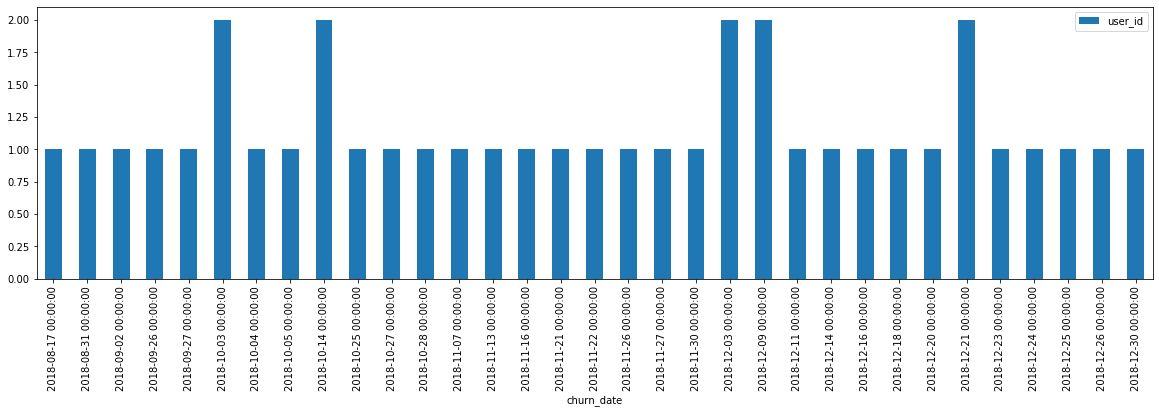

In [19]:
users.pivot_table(index = 'churn_date', values = 'user_id', aggfunc = 'count').plot(y = 'user_id', kind = 'bar',
                                                                                   figsize = (20, 5))

Видим, что абоненты в df users, отключившие свои тарифы на момент формирования набора данных, распределены между 33 датами, при этом отмечу, что уходить абоненты начали с 17 августа 2018 года. Посыл для коммерческого департамента - проанализировать, какие были нововведения в тарифной политике перед этой датой, которые могли бы спровоцировать отток абонентов.

Также видим, что в основном (за исключением 5 дат) компания теряет по одному абоненту в день, в пяти датах видим отток двух клиентов в день.

В целом отток 38 абонентов из абонентской базы в 500 человек не кажется такой уж катастрофической потерей, однако лучше сохранять и преумножать количество своих абонентов, если такая возможность есть.

Вместе с тем отмечу, что для 462 клиентов запись в исследуемом поле отсутствует, поэтому представленное выше распределение не позволит оценить масштаб оттока. 

Чтобы такая возможность появилась, сформируем новый признак user_status, который будет соодержать информацию о том, является ли человек абонентом компании на момент формирования набора данных.

Для этого напишем соответствующую функцию.

Отмечу, что функция не будет работать, если в поле, которое будет принимать фнукция, будут пропущенные значения. Поэтому заменим пропущенные значения в этом поле на 0.

In [20]:
users['churn_date'] = users['churn_date'].fillna(int(0))

Когда пропущенные значения обработаны, напишем функцию, которая будет реализовывать следующую логику:
    
- если в поле записано значение 0, абонент считается действующим и маркируется значением 0;

- в остальных случаях абонент считается ушедшим и маркируется значением 1.

In [21]:
def ok_not_ok(churn_date):
    if churn_date == 0:
        return int(0)
    else:
        return int(1)

Проверим работу функции.

In [22]:
print(ok_not_ok(0))
print(ok_not_ok('2018-12-31'))
print(ok_not_ok('Абонент не закрыл тариф'))
print(ok_not_ok(0))

0
1
1
0


Видим, что функция работает корректно на тестовых данных. Применим функцию к набору данных, результат работы функции будем помещать в поле user_status.

In [23]:
users['user_status'] = users['churn_date'].apply(ok_not_ok)

Проверим, корректно ли осуществлена замена.

In [24]:
users[['churn_date', 'user_status']]

,churn_date,user_status
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
495,0,0
496,0,0
497,0,0
498,2018-10-25 00:00:00,1


Видим, что замена осуществлена корректно.

## Этап 2.3. Обработка аномальных значений (поле duration в df calls и поле mb_used в df internet).

На данном этапе обработаем аномальные значения.

Напомним, что были выявлены следующие аномальные значения:

1. Значения поля duration в df calls: поле описывает длительность звонка, и в этом поле имеются записи с длительностью звонка в 0 секунд.

2. Значения поля mb_used в df internet: поле описывает количества израсходованных МБ за одну интернет-сессию, и в этом поле имеются записи с количеством израсходованных МБ, равным 0. 

Рассмотрим аномальные значения поля duration в df calls. Длительность звонка, равная нулю, может означать, что звонок не был совершён успешно: собеседник мог просто не взять трубку, поэтому длительность звонка будет составлять 0 минут, хотя сам звонок был совершён.

В этой связи логичным будет пока ничем не заменять нулевые значения, а на базе этого поля сгененрировать новый признак, который описывал бы статус звонка - удачный или неудачный.

Для этого применим ранее написанную функцию ok_not_ok, результаты работы которой будем интерпретировать следующим образом:

- если длительность звонка равна нулю, звонку будет присовен статус "неудачный", а звонок будет маркирован значением 0;

- если длительность звонка больше нуля, звонку будет присвоен статус "удачный", а звонок будет маркирован значением 1.

Протестируем работу функции.

In [25]:
print(ok_not_ok(0))
print(ok_not_ok(10))
print(ok_not_ok(100))

0
1
1


Функция работает корректно на тестовых данных. Применим функцию к набору данных. Результат работы функции поместим в новое поле call_status.

In [26]:
calls['call_status'] = calls['duration'].apply(ok_not_ok)

Проверим, корректно ли отработала функция.

In [27]:
calls.head(10)

,id,call_date,duration,user_id,call_status
0,1000_0,2018-07-25,0,1000,0
1,1000_1,2018-08-17,0,1000,0
2,1000_2,2018-06-11,3,1000,1
3,1000_3,2018-09-21,14,1000,1
4,1000_4,2018-12-15,6,1000,1
5,1000_5,2018-11-02,0,1000,0
6,1000_6,2018-10-18,0,1000,0
7,1000_7,2018-08-22,19,1000,1
8,1000_8,2018-09-15,19,1000,1
9,1000_9,2018-08-15,0,1000,0


Видим, что замена осуществлена корректно.

Таким же образом обработаем пропущенные значения поля mb_used в df internet, так как это поле практически аналогично полю duration в df calls: можно предположить, что если за сессию было использовано 0 МБ, то сессия оказалась неудачной, и абонент не смог выйти в интернет.

Применим ту же функцию ok_not_ok, результаты её работы будем интерпретировать следующим образом:

- если количество израсходованных МБ равно нулю, сессии будет присовен статус "неудачная", а сессия будет маркирована значением 0;

- если количество израсходованных МБ больше нуля, сессии будет присовен статус "удачная", а сессия будет маркирована значением 1;

Протестируем работу функции.

In [28]:
print(ok_not_ok(0))
print(ok_not_ok(10))
print(ok_not_ok(100))

0
1
1


Функция работает корректно на тестовых данных. Применим функцию к набору данных. Результат работы функции поместим в новое поле session_status.

In [29]:
internet['session_status'] = internet['mb_used'].apply(ok_not_ok)

Проверим, корректно ли отработала функция.

In [30]:
internet.head(10)

,id,mb_used,session_date,user_id,session_status
0,1000_0,113,2018-11-25,1000,1
1,1000_1,1053,2018-09-07,1000,1
2,1000_2,1198,2018-06-25,1000,1
3,1000_3,551,2018-08-22,1000,1
4,1000_4,303,2018-09-24,1000,1
5,1000_5,400,2018-10-02,1000,1
6,1000_6,541,2018-09-07,1000,1
7,1000_7,416,2018-07-11,1000,1
8,1000_8,506,2018-10-08,1000,1
9,1000_9,346,2018-09-03,1000,1


Видим, что замена осуществлена корректно.

## Выводы по этапу 2.

На данном этапе была произведена предварительная обработка данных, которая заключалась в:

- преобразовании типов данных;


- обработке пропущенных значений;


- обработке аномальных значений.

В рамках преобразования типов данных были преобразованы данные в поле duration в df calls и поле mb_used в df internet, поля call_date в df calls, поля session_date в df internet, поля message_date в df messages, полей churn_date и reg_date в df users.

Данные в этих полях описывают длительность звонка в количество израсходованных МБ во время интернет-сессии. Так как корректнее использовать целочисленные значения для измерения этих параметров, они были преобразованы из типа float в тип int, что позволило округлить дробные значения.

Данные поля call_date в df calls, поля session_date в df internet, поля message_date в df messages, полей churn_date и reg_date в df users были преобразованы из типа str в тип datatime за счёт применения соответствующей функции.

В рамках обработки пропущенных значений исследовалось поле churn_date в df users. Это поле описывает дату, когда абонент закрыл свой тариф в компании. Следовательно, если для абонента это поле не заполнено, аботнент ещё не отказался от тарифа и на момент формирования набора данных сотрудничает с компанией, если значение в поле заполнено - абонент закрыл тариф и ушёл в отток. 

Так как нам важно понимать статус абонента - ушедший или действующий - пропуски в поле churn_date не обрабатывались, а на основе поле churn_date было создано поле user_status, которое содержит значение 0, если абонент ещё не закрыл свой тариф, и значение 1, если абонент ушёл в отток. Для этого была написана соответствующая функция.

В рамках обработки аномальных значений были исследованы поле duration в df calls и поле mb_used в df internet. Как отмечалось ранее, эти поля описывают длительность звонка в количество израсходованных МБ во время интернет-сессии.

Были сделаны следующие предположения:

- если поле duration в df calls имеет значение 0, значит, вызов был неудачный: абонент сделал вызов, но собеседник не поднял трубку, следовательно, звонок был совершён, но абонент не потратил минуты;


- если поле mb_used в df internet имеет значение 0, значит, сессия была неудачной: абонент совершил попытку начать интернет-сессию, однако мог столкнуться с какой-либо ошибкой или проблемой (например, находился в месте, где телефон не принимает сигнал вышки), следовательно, сессия была начата, но МБ не были израсходованы.

С учётом этой логики в df были добавлены новые поля: call_status в df calls и session_status в df internet, для этого была написана соответствующая функция. 

В случае если длительность звонка/количество израсходованных МБ равно нулю, в соответствующем поле проставляется отметка о том, что звонок/сессия неудачные, а если длительность звонка/количество израсходованных МБ больше нуля, в соответствующем поле проставляется отметка о том, что звонок/сессия удачные.

# Этап 3. Расчёт дополнительных параметров.

В рамках данного этапа нам предстоит рассчитать следующие параметры:

- количество сделанных звонков и израсходованных минут разговора по месяцам;

- количество отправленных сообщений по месяцам;

- объем израсходованного интернет-трафика по месяцам;

- помесячную выручку.

Все параметры должны быть рассчитаны для каждого пользователя отдельно.

## Этап 3.1. Расчёт параметра "Количество сделанных звонков и израсходованных минут разговора по месяцам".

Чтобы сделать расчёт параметров по месяцам, создадим дополнительное поле month, в котором будет номер месяца, в котором абонент совершил звонок. Месяц будет извлечён из поля call_date с помощью метода dt.month 

In [31]:
calls['month'] = calls['call_date'].dt.month

Проверим корректность извлечения месяца. Вызовем первые 10 строк из df calls.

In [32]:
calls.head(10)

,id,call_date,duration,user_id,call_status,month
0,1000_0,2018-07-25,0,1000,0,7
1,1000_1,2018-08-17,0,1000,0,8
2,1000_2,2018-06-11,3,1000,1,6
3,1000_3,2018-09-21,14,1000,1,9
4,1000_4,2018-12-15,6,1000,1,12
5,1000_5,2018-11-02,0,1000,0,11
6,1000_6,2018-10-18,0,1000,0,10
7,1000_7,2018-08-22,19,1000,1,8
8,1000_8,2018-09-15,19,1000,1,9
9,1000_9,2018-08-15,0,1000,0,8


Видим, что месяц совершения звонка был успешно извлечён из поля call_date.

Теперь можно рассчитать количество и суммарную продолжительность звонков для каждого абонента в разрезе каждого месяца. Для этого воспользуемся сводной таблицей, сделаем группировку df calls сначала по пользователям, потом по месяцам. В качестве значения передадим длительность звонка, в качестве агрегирующих функций - sum и count. Чтобы получившаяся таблица выглядела читабельно, переиндексируем её строки методом reset_index.

In [33]:
calls_monthly_stat = calls.pivot_table(index = ['user_id', 'month'], values = 'duration', 
                                       aggfunc = ('count', 'sum')).reset_index()
calls_monthly_stat.columns = ['user_id', 'month', 'calls_count', 'calls_sum']

In [34]:
calls_monthly_stat.head(10)

,user_id,month,calls_count,calls_sum
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466
5,1000,10,57,350
6,1000,11,43,338
7,1000,12,46,333
8,1001,11,59,430
9,1001,12,63,414


Видим, что мы успешно посчитали количество звонков и их продолжительность в разбивке по месяцам 2018 года.

## Этап 3.2. Расчёт параметра "Количество отправленных сообщений по месяцам".

Логика действий в данном аналогична логике предыдущего этапа: 

1. Создаём поле month в df messages, помещаем туда номер месяца, извлечённый из поля message_date.

2. Создаём сводную таблицу.

In [35]:
messages['month'] = messages['message_date'].dt.month

Проверяем корректность извлечения месяца.

In [36]:
messages.head(10)

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12
5,1000_5,2018-06-20,1000,6
6,1000_6,2018-11-19,1000,11
7,1000_7,2018-10-29,1000,10
8,1000_8,2018-06-25,1000,6
9,1000_9,2018-12-18,1000,12


Видим, что месяц был корректно извлечён из поля message_date. Приступим к созданию сводной таблицы.

In [37]:
messages_monthly_stat = messages.pivot_table(index = ['user_id', 'month'], values = 'message_date', 
                                       aggfunc = 'count').reset_index()
messages_monthly_stat.columns = ['user_id', 'month', 'messages_count']

In [38]:
messages_monthly_stat.head(10)

,user_id,month,messages_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
5,1000,10,73
6,1000,11,58
7,1000,12,70
8,1002,6,4
9,1002,7,11


Количество отправленных сообщений по каждому абоненту в разбивке по месяцам 2018 года посчитано успешно.

## Этап 3.3. Расчёт параметра "Объём израсходованного интернет-трафика по месяцам".

Логика действий в данном этапе аналогична логике предыдущего этапа:

1. Создаём поле session_month в df internet, помещаем туда номер месяца, извлечённый из поля session_date.

2. Создаём сводную таблицу.

In [39]:
internet['month'] = internet['session_date'].dt.month

Проверяем корректность извлечения месяца.

In [40]:
internet.head(10)

,id,mb_used,session_date,user_id,session_status,month
0,1000_0,113,2018-11-25,1000,1,11
1,1000_1,1053,2018-09-07,1000,1,9
2,1000_2,1198,2018-06-25,1000,1,6
3,1000_3,551,2018-08-22,1000,1,8
4,1000_4,303,2018-09-24,1000,1,9
5,1000_5,400,2018-10-02,1000,1,10
6,1000_6,541,2018-09-07,1000,1,9
7,1000_7,416,2018-07-11,1000,1,7
8,1000_8,506,2018-10-08,1000,1,10
9,1000_9,346,2018-09-03,1000,1,9


Видим, что месяц был корректно извлечён из поля session_date. Приступим к созданию сводной таблицы.

In [41]:
internet_monthly_stat = internet.pivot_table(index = ['user_id', 'month'], values = 'mb_used', 
                                       aggfunc = 'sum').reset_index()
internet_monthly_stat.columns = ['user_id', 'month', 'mb_used_sum']

In [42]:
internet_monthly_stat.head(10)

,user_id,month,mb_used_sum
0,1000,5,2256
1,1000,6,23257
2,1000,7,14016
3,1000,8,14070
4,1000,9,14581
5,1000,10,14717
6,1000,11,14768
7,1000,12,9827
8,1001,11,18452
9,1001,12,14053


Сумма израсходованных МБ по каждому абоненту в разбивке по месяцам 2018 года посчитано успешно.

## Этап 3.4. Расчёт параметра "Помесячная выручка"

На данном этапе нам предстоит рассчитать по каждому пользователю помесячную выручку. Та ещё задачка, да?

Отмечу, что помесячная выручка будет складываться из 4 компонентов:

1. Ежемесячная абонентская плата, величина которой зафиксирована и описывается условиями тарифа.

2. Платежи абонента за дополнительные минуты, не предусмотренные тарифом.

3. Платежи абонента за дополнительные МБ интернета, не предусмотренные тарифом.

4. Платежи абонента за дополнительные сообщения, не предусмотренные тарифом.

Отмечу, что в описании проекта представлен упрощённый алгоритм расчёта помесячной выручки: "вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану".

На практике абонент может подключиться к тарифному плану, например, 2018-01-30, разово уплатив стоимость абонентской платы, и эта абонентская плата ляжет на доходы компании в январе. Также абонент может израсходовать минуты и трафик, включённые в тариф, за 15 дней, а далее он будет платить за дополнительные минуты и приобретать дополнительные МБ интернета. Плата абонента за дополнительные минуты и МБ, которую абонент совершит уже в феврале, должна лечь в доходы компании от абонента в феврале. 

Однако в рамках данного проекта предлагаю условиться о том, что если клиент вносит абонентскую плату в одном месяце, а дополнительные минуты и МБ приобретает во втором месяце, доходы от приобретения дополнительных минут и МБ относятся к выручке от абонента в том месяце, в котором он внёс плату за абонентское обслуживание.

Чтобы упросить процесс расчёта, предлагаю считать доход для каждой метрики отдельно (отдельно доход от звонков, отдельно - от интернета, отдельно - от сообщений), а также отдельным параметром выделить саму абонентскую плату. Потом объединить все доходы в общую таблицу, что, как мне кажется, будет иметь большую бизнес-ценность, так как позволить понять, какая часть тарифного плана - минуты, интернет или сообщения - генирирует больше выручки.

### Этап 3.4.1. Расчёт помесячных платежей от использования абонентом дополнительных минут.

Начнём с расчёта помесячных платежей от использования абонентом дополнительных минут. 

Чтобы это сделать, необходимо к df calls_monthly_stat присоединить df users, чтобы узнать его тариф, дату его открытия, статус и дату закрытия, если абонент ушёл. Также необходимо присоединить df tariffs, чтобы получить объём включённых в него минут, МБ и сообщений и ценовые характеристики дополнительных минут, МБ и сообщений.

Вместе с тем мы помним, что в df users имя тарифа хранится в поле tariff, а в df tariffs имя тарифа хранится в поле tariff_name. Чтобы у нас была возможность осуществить соединение таблиц, необходимо убрать различия в наименовании этих полей. 

Для этого передадим df users список с новыми именами полей.

In [43]:
users.columns = ['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name', 'reg_date', 'tariff_name', 'user_status']

Проверим, корректно ли осуществлена замена имён полей в df users.

In [44]:
users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name,user_status
0,1000,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
1,1001,41,0,Москва,Иван,Ежов,2018-11-01,smart,0
2,1002,59,0,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,0
3,1003,23,0,Москва,Белла,Белякова,2018-08-17,ultra,0
4,1004,68,0,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,0
5,1005,67,0,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,0
6,1006,21,0,Ульяновск,Леонид,Ермолаев,2018-02-26,smart,0
7,1007,65,0,Москва,Юна,Березина,2018-04-19,smart,0
8,1008,63,0,Челябинск,Рустэм,Пономарёв,2018-12-19,smart,0
9,1009,24,0,Пермь,Василиса,Блинова,2018-03-22,smart,0


Видим, что мы успешно передали df users список с новыми именами полей. Теперь мы можем корректно произвести соединение df.

Сначала присоединим к df calls_monthly_sum, в котором описано количество израсходованных минут для каждого абонента в разрезе месяцев 2018 года. Воспользуемся методом merge, будем использовать тип слияния left, так как мы не хотим потерять ни одного абонента из df calls_monthly_stat.

In [45]:
calls_monthly_stat = calls_monthly_stat.merge(users, on = 'user_id', how = 'left')

Проверим, корректно ли осуществилось слияние. Вызовем на экран первые 10 строк calls_monthly_stat.

In [46]:
calls_monthly_stat.head(10)

,user_id,month,calls_count,calls_sum,age,churn_date,city,first_name,last_name,reg_date,tariff_name,user_status
0,1000,5,22,159,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
1,1000,6,43,172,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
2,1000,7,47,340,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
3,1000,8,52,408,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
4,1000,9,58,466,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
5,1000,10,57,350,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
6,1000,11,43,338,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
7,1000,12,46,333,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
8,1001,11,59,430,41,0,Москва,Иван,Ежов,2018-11-01,smart,0
9,1001,12,63,414,41,0,Москва,Иван,Ежов,2018-11-01,smart,0


Видим, что соединение осуществлено успешно. Однако в текущем виде df calls_monthly_stat содержит много неинформативных полей, от которых можно избавиться, чтобы не захламлять его лишней информацией. Применим метод drop.

In [47]:
calls_monthly_stat.drop(['calls_count', 'age', 'city', 'first_name', 'last_name'], axis = 'columns', inplace = True)

Проверим df calls_monthly_stat после удаления ненужных полей, вызвав его первые 10 строк.

In [48]:
calls_monthly_stat.head(10)

,user_id,month,calls_sum,churn_date,reg_date,tariff_name,user_status
0,1000,5,159,0,2018-05-25,ultra,0
1,1000,6,172,0,2018-05-25,ultra,0
2,1000,7,340,0,2018-05-25,ultra,0
3,1000,8,408,0,2018-05-25,ultra,0
4,1000,9,466,0,2018-05-25,ultra,0
5,1000,10,350,0,2018-05-25,ultra,0
6,1000,11,338,0,2018-05-25,ultra,0
7,1000,12,333,0,2018-05-25,ultra,0
8,1001,11,430,0,2018-11-01,smart,0
9,1001,12,414,0,2018-11-01,smart,0


Виидм, что теперь в df calls_monthly_stat содержится только нужная нам информация.

Далее необходимо присоединить к df calls_monthly_stat df tariffs, чтобы в df calls_monthly_stat хранились ценовые характеристики тарифа, а также включённые в тариф минуты, МБ и сообщения. Как и в случае с df users, воспользуемся методом merge, свяжем df по полю tariff_name (мы уже осуществили переименование этого поля в df users, поэтому присоединение стало возможным), используем тип присоединения left, чтобы не потерять абонентов в df calls_monthly_stat.

In [49]:
calls_monthly_stat = calls_monthly_stat.merge(tariffs, on = 'tariff_name', how = 'left')

Проверим, удалось ли соединение. Вызовем первые 10 строк df calls_monthly_stat.

In [50]:
calls_monthly_stat.head(10)

,user_id,month,calls_sum,churn_date,reg_date,tariff_name,user_status,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,159,0,2018-05-25,ultra,0,1000,30720,3000,1950,150,1,1
1,1000,6,172,0,2018-05-25,ultra,0,1000,30720,3000,1950,150,1,1
2,1000,7,340,0,2018-05-25,ultra,0,1000,30720,3000,1950,150,1,1
3,1000,8,408,0,2018-05-25,ultra,0,1000,30720,3000,1950,150,1,1
4,1000,9,466,0,2018-05-25,ultra,0,1000,30720,3000,1950,150,1,1
5,1000,10,350,0,2018-05-25,ultra,0,1000,30720,3000,1950,150,1,1
6,1000,11,338,0,2018-05-25,ultra,0,1000,30720,3000,1950,150,1,1
7,1000,12,333,0,2018-05-25,ultra,0,1000,30720,3000,1950,150,1,1
8,1001,11,430,0,2018-11-01,smart,0,50,15360,500,550,200,3,3
9,1001,12,414,0,2018-11-01,smart,0,50,15360,500,550,200,3,3


Видим, что соединение прошло корректно, однако в df calls_monthly_stat снова есть лишние поля, которые можно удалить для удобства восприятия df calls_monthly_stat. Используем метод drop.

In [51]:
calls_monthly_stat.drop(['messages_included', 'mb_per_month_included', 'rub_per_gb', 
                         'rub_per_message'], axis = 'columns', inplace=True)

Проверим df calls_monthly_stat после удаления ненужных полей, вызвав его первые 10 строк.

In [52]:
calls_monthly_stat.head(10)

,user_id,month,calls_sum,churn_date,reg_date,tariff_name,user_status,minutes_included,rub_monthly_fee,rub_per_minute
0,1000,5,159,0,2018-05-25,ultra,0,3000,1950,1
1,1000,6,172,0,2018-05-25,ultra,0,3000,1950,1
2,1000,7,340,0,2018-05-25,ultra,0,3000,1950,1
3,1000,8,408,0,2018-05-25,ultra,0,3000,1950,1
4,1000,9,466,0,2018-05-25,ultra,0,3000,1950,1
5,1000,10,350,0,2018-05-25,ultra,0,3000,1950,1
6,1000,11,338,0,2018-05-25,ultra,0,3000,1950,1
7,1000,12,333,0,2018-05-25,ultra,0,3000,1950,1
8,1001,11,430,0,2018-11-01,smart,0,500,550,3
9,1001,12,414,0,2018-11-01,smart,0,500,550,3


Видим, что в df calls_monthly_stat остались только нужные нам поля. Теперь можно приступить к расчёту помесячных платежей от использования абонентом дополнительных минут. 

Для этого напишем соответствующую функцию, которая будет принимать на вход всю строку и реализовывать следующую логику:

1. Для каждого абонента на каждую неделю функция сравнивает количество израсходованных и предусмотренных тарифом минут.

2. Если абонент израсходовал меньше минут, чем предусмотрено тарифом, функция возвращает значение дополнительных платежей, равное нулю.

3. Если абонент израсходовал больше минут, чем предусмотрено тарифом, функция считает, сколько минут было израсходовано сверх предусмотренного тарифом размера, и умножает это количество на стоимость 1 дополнительной минуты.

In [53]:
def calls_monthly_add_income(row):
    calls_sum = row['calls_sum']
    minutes_included = row['minutes_included']
    rub_per_minute = row['rub_per_minute']
    if calls_sum <= minutes_included:
        return 0
    elif calls_sum > minutes_included:
        add_minutes = calls_sum - minutes_included
        return add_minutes * rub_per_minute

Протестируем работу функции на тестовых данных.

In [54]:
row_values_1 = [100, 320, 1]
row_values_2 = [200, 320, 1]
row_values_3 = [300, 320, 1]
row_values_4 = [400, 320, 1]
row_values_5 = [500, 320, 1]
row_columns = ['calls_sum', 'minutes_included', 'rub_per_minute']
row_1 = pd.Series(data=row_values_1, index=row_columns)
row_2 = pd.Series(data=row_values_2, index=row_columns)
row_3 = pd.Series(data=row_values_3, index=row_columns)
row_4 = pd.Series(data=row_values_4, index=row_columns)
row_5 = pd.Series(data=row_values_5, index=row_columns)

In [55]:
print(calls_monthly_add_income(row_1))
print(calls_monthly_add_income(row_2))
print(calls_monthly_add_income(row_3))
print(calls_monthly_add_income(row_4))
print(calls_monthly_add_income(row_5))

0
0
0
80
180


Видим, что функция работает корректно на тестовых данных. Применим функцию к df calls_monthly_stat для вычисления помесячных платежей от использования абонентом дополнительных минут.

In [56]:
calls_monthly_stat['calls_monthly_add_income'] = calls_monthly_stat.apply(calls_monthly_add_income, axis = 1)

Проверим корректность работы функции. Так как абоненты, которые используют менее 500 минут, не генерируют дополнительные платежи, сделаем срез, в котором буду только те абоненты, у которых тариф smart и у которых количество использованных минут превышает 500.

Отмечу, что значение 500 выбрано не просто так: в тарифе smart 500 минут предоставляются в рамках условий тарифа, и за их использование платежи не взимаются.

In [57]:
calls_monthly_stat.query('calls_sum > 500 and tariff_name == "smart"').head(5)

,user_id,month,calls_sum,churn_date,reg_date,tariff_name,user_status,minutes_included,rub_monthly_fee,rub_per_minute,calls_monthly_add_income
32,1005,3,606,0,2018-01-25,smart,0,500,550,3,318
33,1005,4,712,0,2018-01-25,smart,0,500,550,3,636
34,1005,5,595,0,2018-01-25,smart,0,500,550,3,285
35,1005,6,612,0,2018-01-25,smart,0,500,550,3,336
36,1005,7,569,0,2018-01-25,smart,0,500,550,3,207


Видим, что функция корректно считает помесячные платежи от использования абонентом дополнительных минут.

### Этап 3.4.2. Расчёт помесячных платежей от использования абонентом дополнительных МБ интернета.

Логика расчёта помесячных платежей от использования абонентом дополнительных МБ интернета аналогична логике, применённой на этапе 3.4.1.

Добавим в df internet_monthly_stat информацию из df users и удалим ненужные поля.

In [58]:
internet_monthly_stat = internet_monthly_stat.merge(users, on = 'user_id', how = 'left')
internet_monthly_stat.drop(['age', 'city', 'first_name', 'last_name'], axis = 'columns', inplace = True)

Добавим в df internet_monthly_stat информацию из df tariffs и удалим ненужные поля.

In [59]:
internet_monthly_stat = internet_monthly_stat.merge(tariffs, on = 'tariff_name', how = 'left')
internet_monthly_stat.drop(['messages_included', 'minutes_included', 'rub_per_minute', 
                         'rub_per_message'], axis = 'columns', inplace=True)

Проверим конечный вариант df internet_monthly_stat, для этого выведем первые 10 строк df.

In [60]:
internet_monthly_stat.head(10)

,user_id,month,mb_used_sum,churn_date,reg_date,tariff_name,user_status,mb_per_month_included,rub_monthly_fee,rub_per_gb
0,1000,5,2256,0,2018-05-25,ultra,0,30720,1950,150
1,1000,6,23257,0,2018-05-25,ultra,0,30720,1950,150
2,1000,7,14016,0,2018-05-25,ultra,0,30720,1950,150
3,1000,8,14070,0,2018-05-25,ultra,0,30720,1950,150
4,1000,9,14581,0,2018-05-25,ultra,0,30720,1950,150
5,1000,10,14717,0,2018-05-25,ultra,0,30720,1950,150
6,1000,11,14768,0,2018-05-25,ultra,0,30720,1950,150
7,1000,12,9827,0,2018-05-25,ultra,0,30720,1950,150
8,1001,11,18452,0,2018-11-01,smart,0,15360,550,200
9,1001,12,14053,0,2018-11-01,smart,0,15360,550,200


Видим, что все необходимые данные для расчёта помесячных платежей от использования абонентом дополнительных МБ интернета имеются в df.

Отметим несколько вводных: в 1 ГБ содержится 1024 МБ, следовательно, в тарифе ultra предусмотрено наличие 30 ГБ, в тарифе smart - 15 ГБ. При расходовании этих ГБ абонент покупает не МБ, а ГБ. Так, если пользователь выходит за пределы трафика, предусмотренного тарифом, и использует дополнительно 300 МБ, то платит он не за 300 МБ, а за 1 ГБ. Следовательно, разницу между фактическим расходом МБ и количеством МБ, предусмотренным тарифом, следует переводить в ГБ, деля на 1024, и округлять в большую сторону с помощью метода ceil библиотеки math.

Напишем соответствующую функцию, которая принимает на вход строку и реализует следующую логику:

1. Для каждого абонента на каждую неделю функция сравнивает количество израсходованных и предусмотренных тарифом МБ.

2. Если абонент израсходовал меньше МБ, чем предусмотрено тарифом, функция возвращает значение дополнительных платежей, равное нулю.

3. Если абонент израсходовал больше МБ, чем предусмотрено тарифом, функция считает, сколько минут было израсходовано сверх предусмотренного тарифом размера, делит это значение на 1024, чтобы перевести их в ГБ, округляет полученное значение в большую сторону и умножает это количество на стоимость 1 дополнительного ГБ. 

In [61]:
def mb_monthly_add_income(row):
    mb_used_sum = row['mb_used_sum']
    mb_per_month_included = row['mb_per_month_included']
    rub_per_gb = row['rub_per_gb']
    if mb_used_sum <= mb_per_month_included:
        return 0
    elif mb_used_sum > mb_per_month_included:
        add_gb = math.ceil(((mb_used_sum - mb_per_month_included) / 1024))
        return add_gb * rub_per_gb

Протестируем работу функции на тестовых данных.

In [62]:
row_values_1 = [30719, 30720, 150]
row_values_2 = [30731, 30720, 150]
row_values_3 = [32769, 30720, 150]
row_values_4 = [15350, 15360, 200]
row_values_5 = [15560, 15360, 200]
row_values_6 = [17600, 15360, 200]
row_columns = ['mb_used_sum', 'mb_per_month_included', 'rub_per_gb']
row_1 = pd.Series(data=row_values_1, index=row_columns)
row_2 = pd.Series(data=row_values_2, index=row_columns)
row_3 = pd.Series(data=row_values_3, index=row_columns)
row_4 = pd.Series(data=row_values_4, index=row_columns)
row_5 = pd.Series(data=row_values_5, index=row_columns)
row_6 = pd.Series(data=row_values_6, index=row_columns)

In [63]:
print(mb_monthly_add_income(row_1))
print(mb_monthly_add_income(row_2))
print(mb_monthly_add_income(row_3))
print(mb_monthly_add_income(row_4))
print(mb_monthly_add_income(row_5))
print(mb_monthly_add_income(row_6))

0
150
450
0
200
600


Видим, что функция работает корректно на тестовых данных. Применим функцию к df internet_monthly_stat для вычисления помесячных платежей от использования абонентом дополнительных МБ интернета.

In [64]:
internet_monthly_stat['mb_monthly_add_income'] = internet_monthly_stat.apply(mb_monthly_add_income, axis = 1)

Проверим корректность работы функции. Так как абоненты, которые используют менее 15 ГБ, не генерируют дополнительные платежи, сделаем срез, в котором буду только те абоненты, у которых тариф smart и у которых количество использованных МБ превышает 15360 (эквивалентно 15 ГБ).

In [65]:
internet_monthly_stat.query('tariff_name == "smart" and mb_used_sum > 15360').head(5)

,user_id,month,mb_used_sum,churn_date,reg_date,tariff_name,user_status,mb_per_month_included,rub_monthly_fee,rub_per_gb,mb_monthly_add_income
8,1001,11,18452,0,2018-11-01,smart,0,15360,550,200,800
11,1002,7,17601,0,2018-06-17,smart,0,15360,550,200,600
12,1002,8,20347,0,2018-06-17,smart,0,15360,550,200,1000
13,1002,9,16712,0,2018-06-17,smart,0,15360,550,200,400
15,1002,11,18610,0,2018-06-17,smart,0,15360,550,200,800


Видим, что функция корректно считает помесячные платежи от использования абонентом дополнительных МБ.

### Этап 3.4.3. Расчёт помесячных платежей от использования абонентом дополнительных сообщений.

Собственно, план такой же: присоединяем df users и df tariffs, чистим от лишних полей.

In [66]:
messages_monthly_stat = messages_monthly_stat.merge(users, on = 'user_id', how = 'left')
messages_monthly_stat.drop(['age', 'city', 'first_name', 'last_name'], axis = 'columns', inplace = True)

In [67]:
messages_monthly_stat.head(5)

,user_id,month,messages_count,churn_date,reg_date,tariff_name,user_status
0,1000,5,22,0,2018-05-25,ultra,0
1,1000,6,60,0,2018-05-25,ultra,0
2,1000,7,75,0,2018-05-25,ultra,0
3,1000,8,81,0,2018-05-25,ultra,0
4,1000,9,57,0,2018-05-25,ultra,0


In [68]:
messages_monthly_stat = messages_monthly_stat.merge(tariffs, on = 'tariff_name', how = 'left')
messages_monthly_stat.drop(['mb_per_month_included', 'minutes_included', 'rub_per_minute', 
                         'rub_per_gb'], axis = 'columns', inplace=True)

In [69]:
messages_monthly_stat.head(10)

,user_id,month,messages_count,churn_date,reg_date,tariff_name,user_status,messages_included,rub_monthly_fee,rub_per_message
0,1000,5,22,0,2018-05-25,ultra,0,1000,1950,1
1,1000,6,60,0,2018-05-25,ultra,0,1000,1950,1
2,1000,7,75,0,2018-05-25,ultra,0,1000,1950,1
3,1000,8,81,0,2018-05-25,ultra,0,1000,1950,1
4,1000,9,57,0,2018-05-25,ultra,0,1000,1950,1
5,1000,10,73,0,2018-05-25,ultra,0,1000,1950,1
6,1000,11,58,0,2018-05-25,ultra,0,1000,1950,1
7,1000,12,70,0,2018-05-25,ultra,0,1000,1950,1
8,1002,6,4,0,2018-06-17,smart,0,50,550,3
9,1002,7,11,0,2018-06-17,smart,0,50,550,3


Видим, что в df messages_monthly_stat остались только нужные нам поля. Теперь можно приступить к расчёту помесячных платежей от использования абонентом дополнительных сообщений. 

Для этого напишем соответствующую функцию, которая будет принимать на вход всю строку и реализовывать следующую логику:

1. Для каждого абонента на каждую неделю функция сравнивает количество израсходованных и предусмотренных тарифом сообщений.

2. Если абонент израсходовал меньше сообщений, чем предусмотрено тарифом, функция возвращает значение дополнительных платежей, равное нулю.

3. Если абонент израсходовал больше сообщений, чем предусмотрено тарифом, функция считает, сколько сообщений было израсходовано сверх предусмотренного тарифом размера, и умножает это количество на стоимость 1 дополнительного сообщения.

In [70]:
def messages_monthly_add_income(row):
    messages_count = row['messages_count']
    messages_included = row['messages_included']
    rub_per_message = row['rub_per_message']
    if messages_count <= messages_included:
        return 0
    elif messages_count > messages_included:
        add_messages = messages_count - messages_included
        return add_messages * rub_per_message

Проверим работу функции на тестовых данных.

In [71]:
row_values_1 = [49, 50, 3]
row_values_2 = [51, 50, 3]
row_values_3 = [999, 1000, 1]
row_values_4 = [1000, 1000, 1]
row_values_5 = [1010, 1000, 1]
row_columns = ['messages_count', 'messages_included', 'rub_per_message']
row_1 = pd.Series(data=row_values_1, index=row_columns)
row_2 = pd.Series(data=row_values_2, index=row_columns)
row_3 = pd.Series(data=row_values_3, index=row_columns)
row_4 = pd.Series(data=row_values_4, index=row_columns)
row_5 = pd.Series(data=row_values_5, index=row_columns)

In [72]:
print(messages_monthly_add_income(row_1))
print(messages_monthly_add_income(row_2))
print(messages_monthly_add_income(row_3))
print(messages_monthly_add_income(row_4))
print(messages_monthly_add_income(row_5))

0
3
0
0
10


Видим, что функция работает корректно на тестовых данных. Применим функцию к df messages_monthly_stat для вычисления помесячных платежей от использования абонентом дополнительных сообщений.

In [73]:
messages_monthly_stat['messages_monthly_add_income'] = messages_monthly_stat.apply(messages_monthly_add_income, axis = 1)

Проверим корректность работы функции. Так как абоненты, которые используют менее 50 сообщений, не генерируют дополнительные платежи, сделаем срез, в котором буду только те абоненты, у которых тариф smart и у которых количество использованных сообщений превышает 50.

In [74]:
messages_monthly_stat.query('messages_count > 50 and tariff_name == "smart"').head(5)

,user_id,month,messages_count,churn_date,reg_date,tariff_name,user_status,messages_included,rub_monthly_fee,rub_per_message,messages_monthly_add_income
30,1005,3,56,0,2018-01-25,smart,0,50,550,3,18
34,1005,7,56,0,2018-01-25,smart,0,50,550,3,18
35,1005,8,64,0,2018-01-25,smart,0,50,550,3,42
36,1005,9,52,0,2018-01-25,smart,0,50,550,3,6
38,1005,11,51,0,2018-01-25,smart,0,50,550,3,3


Видим, что функция корректно считает помесячные платежи от использования абонентом дополнительных МБ.

### Этап 3.4.4. Расчёт помесячного дохода по абонентам.

Теперь сформируем df monthly_income, в который поместим сначала помесячные платежи от использования абонентом дополнительных минут, а потом добавим помесячные платежи от остальных услуг.

In [75]:
monthly_income = calls_monthly_stat[['user_id', 'month', 'tariff_name', 'rub_monthly_fee', 'calls_monthly_add_income']]

Чтобы после присоединения таблиц не удалять ненужные поля, при присоединении ограничим набор полей из таблиц теми, которые мы будем присоединять. Используем тип присоединения outer, так как нам нужны данные из обоих таблиц. 

In [76]:
monthly_income = monthly_income.merge(internet_monthly_stat[['user_id', 'month', 'tariff_name', 'rub_monthly_fee', 
'mb_monthly_add_income']], on = ['user_id', 'month', 'tariff_name', 'rub_monthly_fee'], how = 'outer')

In [77]:
monthly_income = monthly_income.merge(messages_monthly_stat[['user_id', 'month', 'tariff_name', 'rub_monthly_fee',
'messages_monthly_add_income']], on = ['user_id', 'month', 'tariff_name', 'rub_monthly_fee'], how = 'outer')

Так как в df monthly_income после соединения таблиц данные о доходах содержатся в типе float, переведём их в тип int. 

Кроме того, при объединении таблиц у нас появились значения типа NaN: это связано с тем, что в df monthly_income содержится информация о месячном доходе от абонента в разрезе каждой услуги, а какой-то абонент мог не пользоваться какой-то услугой в определённый месяц. Например, user 1000 мог в 5 месяц пользоваться только звонками, поэтому доход может быть только от использования им дополнительных минут, другими услугами абонент в этом месяце не пользовался. В 6 месяце абонент пользовался только интернетом и никому не звонил, соответственно, доход в этом месяце может быть только от использования МБ свех тарифа (не считая абонплаты). При этом данные по этим доходам содержатся в разных таблицах. 

При объединении таблиц у абонента в 5 месяце будет значение дохода от использования дополнительных минут и NaN от использования дополнительных МБ, так как интернетом в 5 месяце он не пользовался. Соответственно, в 6 месяце будет NaN от минут и доход от МБ.

Так как речь идёт о доходе от использования дополнительных услуг, значение NaN говорит о том, что в данном месяце абонент не воспользовался данной услугой, следовательно, дохода от этой услуги компания не получила. Поэтому NaN логично заменить на 0, что будет логически правильным.

In [78]:
monthly_income[['rub_monthly_fee', 'calls_monthly_add_income', 'mb_monthly_add_income', 'messages_monthly_add_income']] = \
monthly_income[['rub_monthly_fee', 'calls_monthly_add_income', 'mb_monthly_add_income', 
'messages_monthly_add_income']].astype('Int64').fillna(0)

Проверим корректность преобразований.

In [79]:
monthly_income.head(10)

,user_id,month,tariff_name,rub_monthly_fee,calls_monthly_add_income,mb_monthly_add_income,messages_monthly_add_income
0,1000,5,ultra,1950,0,0,0
1,1000,6,ultra,1950,0,0,0
2,1000,7,ultra,1950,0,0,0
3,1000,8,ultra,1950,0,0,0
4,1000,9,ultra,1950,0,0,0
5,1000,10,ultra,1950,0,0,0
6,1000,11,ultra,1950,0,0,0
7,1000,12,ultra,1950,0,0,0
8,1001,11,smart,550,0,800,0
9,1001,12,smart,550,0,0,0


Видим, что преобразования и замена пропущенных значений прошли успешно. Можно приступить к расчёту помесячного дохода.

Отмечу также, что на текущий момент в df monthly_income абоненты перемешаны, так как при объединении таблиц в конец df monthly_income добавлялись записи об абонентах, которых изначально не было в df monthly_income. Поэтому, чтобы всё выглядело красиво, сделаем сортировку по возрастанию сначала по user_id, а потом по month. 

In [80]:
monthly_income['total_income'] = monthly_income['rub_monthly_fee'] + monthly_income['calls_monthly_add_income'] \
+ monthly_income['mb_monthly_add_income'] + monthly_income['messages_monthly_add_income']
monthly_income = monthly_income.sort_values(['user_id', 'month'])

Проверим корректность расчёта помесячного дохода и сортировки полей df monthly_income.

In [81]:
monthly_income

,user_id,month,tariff_name,rub_monthly_fee,calls_monthly_add_income,mb_monthly_add_income,messages_monthly_add_income,total_income
0,1000,5,ultra,1950,0,0,0,1950
1,1000,6,ultra,1950,0,0,0,1950
2,1000,7,ultra,1950,0,0,0,1950
3,1000,8,ultra,1950,0,0,0,1950
4,1000,9,ultra,1950,0,0,0,1950
...,...,...,...,...,...,...,...,...
3169,1498,10,smart,550,0,1200,0,1750
3170,1499,9,smart,550,0,0,0,550
3171,1499,10,smart,550,0,600,0,1150
3172,1499,11,smart,550,336,600,27,1513


# Вывод по этапу 3.

На данном этапе на основе имеющихся данных были рассчитаны дополнительные параметры:

- количество сделанных звонков и израсходованных минут разговора по месяцам;


- количество отправленных сообщений по месяцам;


- объем израсходованного интернет-трафика по месяцам;


- помесячная выручка.

При расчёте ппомесячной выручки рассчитывались помесячные платежи абонентов за использование абонентами минут, сообщений и МБ интернета, не включённых в их тариф, а также величина абонентской планы, вносимая ежемесячно.

# Этап 4. Анализ данных

В рамках данного этапа предстоит ответить на следующие вопросы: 


- cколько минут разговора требуется пользователям каждого тарифа в месяц?


- cколько сообщений требуется пользователям каждого тарифа в месяц?


- какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?

Для этого необходимо для кажой услуги посчитать среднее значение, дисперсию и стандартное отклонение, а также построить гистограммы и описать распределения.

## Этап 4.1. Определение необходимого количества минут.

Чтобы выяснить среднее необходимое количество минут для пользователя каждого абонента, используем данные из df calls_monthly_stat, в котором собрана информация о суммарной продолжительности разговоров абонентов в разрезе месяцев 2018 года. 

Отмечу также, что при использовании df calls_monthly_stat нет необходимости фильтровать df по признаку удачности звонка, так как при подсчёте суммарной продолжительности разговоров абонента за месяц неудачные звонки были объеденены с удачными. Следовательно, количество записей в df calls_monthly_stat при фильтрации звонков по их длительности, превышающей ноль, либо не изменится, либо изменится незначительно. Проверим это.

In [82]:
calls_monthly_stat.query('calls_sum > 0')['user_id'].count()

3168

In [83]:
calls_monthly_stat['user_id'].count()

3174

Видим, что количество записей существенно не изменилось, а разница не исказит распределение переменных. Поэтому будем исследовать данные с помощью графиков при условии, что в нём отсутствуют значения, равные нулю.

Выясним среднее необходимое количество минут для абонентов каждого тарифа.

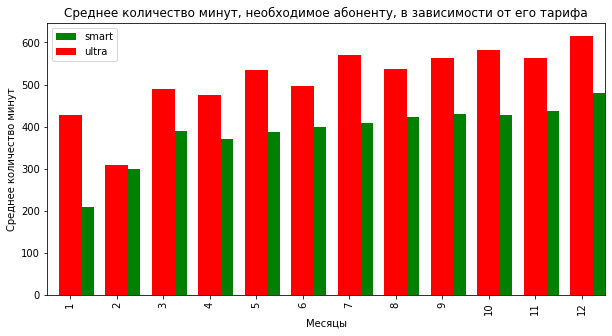

In [84]:
ax = calls_monthly_stat[(calls_monthly_stat['tariff_name'] == 'smart') & (calls_monthly_stat['calls_sum'] > 0)]\
.pivot_table(index = 'month', 
values = 'calls_sum', aggfunc = 'mean').plot(y = 'calls_sum', kind = 'bar', figsize = (10, 5), color = 'g', 
align = 'edge', label = 'smart', title = ('Среднее количество минут, необходимое абоненту, в зависимости от его тарифа'))
calls_monthly_stat[(calls_monthly_stat['tariff_name'] == 'ultra') & (calls_monthly_stat['calls_sum'] > 0)]\
.pivot_table(index = 'month', values = 'calls_sum', 
aggfunc = 'mean').plot(y = 'calls_sum', kind = 'bar', figsize = (10, 5), color = 'r', ax = ax, align = 'center', 
label = 'ultra')
plt.xlabel('Месяцы')
plt.ylabel('Среднее количество минут')
plt.show()

В целом видим, что абонентам с тарифом smart в среднем требуется меньше минут в месяц, чем абонентам с тарифом ultra.

Однако такой способ определения нужного количества минут не очень информативен, поэтому рассчитаем необходимые статистики. 

А для этого мы снова напишем функции. Нужно больше функций!

Функция будет принимать 2 входные значения: набор данных и исследуемое в нём поле. Здесь неудачные звонки также не учитываем.

В переданном наборе данных функция создаст сводную таблицу, сгруппирует данные по тарифу, в качестве аргумента параметру values передат переданный функции столбец, и на данных этого столбца рассчитает все необходимые статистики: количество звонков, среднюю продожительность звонка, стандартное отклоненние и дисперсию длительности звонка, а также минимальную и максимальную продолжительность звонка.

In [85]:
def statistics(df, column):
    statistics = df[df[column] > 0].pivot_table(index = 'tariff_name',values = column, 
    aggfunc = ['count', 'mean', 'std', 'var', 'min', 'max']).reset_index()
    statistics.columns = ['tariff_name', 'count', 'mean', 'std', 
                                          'var', 'min', 'max']
    statistics[['mean', 'std', 'var']] =\
    round(statistics[['mean', 'std', 'var', ]], 2)
    display(statistics)

Применим функцию и посчитаем соответствующие статистики.

In [86]:
statistics(calls_monthly_stat, 'calls_sum')

,tariff_name,count,mean,std,var,min,max
0,smart,2221,419.44,188.99,35718.13,2,1435
1,ultra,947,547.76,305.51,93338.43,1,1673


Информация получена в виде сводной таблицы со статистиками через написание соответствующей функции.

Функция позволила узнать, сколько абоненту в среднем требуется минут для полноценной жизни в зависимости от его тарифа, месяца и принципов учёта нулевых значений: для абонента с тарифом smart - около 420, для абонента с тарифом ultra - около 550. 

Отмечу, что для всех статистик характерны высокие значения стандартного отклонения, что указывает на разрозненность использованных минут от абонента к абоненту: присутствуют как не очень общительные (около 1 минуты в месяц), так и гиперобщительные (около 1673 минуты в месяц) абоненты. 

Также было бы интересно посмотреть на среднюю продолжительность звонка. 

Чтобы выяснить необходимое количество минут для пользователя каждого абонента, присоединим к df calls df users, чтобы узнать, какой у абонента тариф. Будем использовать присоединение типа left, чтобы не потерять данные из df calls.

Полученный df назовём calls_stats.

In [87]:
calls_stats = calls.merge(users, on = 'user_id', how = 'left')

Проверим корректность присоединения.

In [88]:
calls_stats.head(10)

,id,call_date,duration,user_id,call_status,month,age,churn_date,city,first_name,last_name,reg_date,tariff_name,user_status
0,1000_0,2018-07-25,0,1000,0,7,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
1,1000_1,2018-08-17,0,1000,0,8,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
2,1000_2,2018-06-11,3,1000,1,6,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
3,1000_3,2018-09-21,14,1000,1,9,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
4,1000_4,2018-12-15,6,1000,1,12,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
5,1000_5,2018-11-02,0,1000,0,11,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
6,1000_6,2018-10-18,0,1000,0,10,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
7,1000_7,2018-08-22,19,1000,1,8,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
8,1000_8,2018-09-15,19,1000,1,9,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
9,1000_9,2018-08-15,0,1000,0,8,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0


Видим, что присоединение осуществлено корректно. 

Определим среднюю продолжительность звонка.

Отмечу, что в наших данных содержится большой кусок "неудачных" звонков, т.е. тех звонков, которые были инициированы, но которые остались без ответа, так как собеседник, вероятнее всего, просто не взял трубку. Поэтому их продолжительность равна нулю. 

Значительное количество (что справедливо для нашей ситуации) нулевых значений, не являющихся дефектами и/или аномалиями и не подлежащих удалению, может сильно влиять на распределение показателя, поэтому посчитаем среднюю длительность звонка по каждому тарифу с учётом и без учёта нулевых значений.

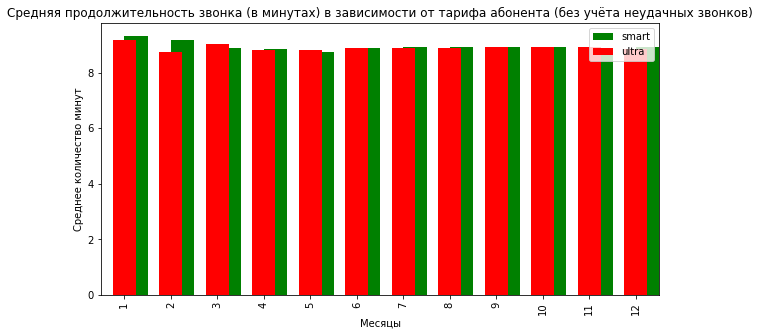

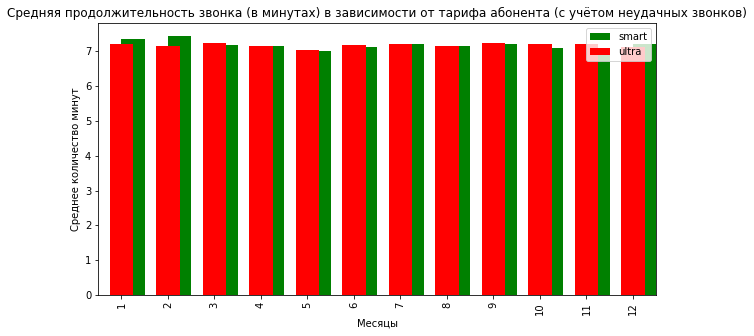

In [89]:
ax = calls_stats[(calls_stats['tariff_name'] == 'smart') & (calls_stats['duration'] > 0)]\
.pivot_table(index = 'month', 
values = 'duration', aggfunc = 'mean').plot(y = 'duration', kind = 'bar', figsize = (10, 5), color = 'g', 
align = 'edge', label = 'smart', 
title = ('Средняя продолжительность звонка (в минутах) в зависимости от тарифа абонента (без учёта неудачных звонков)'))
calls_stats[(calls_stats['tariff_name'] == 'ultra') & (calls_stats['duration'] > 0)]\
.pivot_table(index = 'month', values = 'duration', 
aggfunc = 'mean').plot(y = 'duration', kind = 'bar', figsize = (10, 5), color = 'r', ax = ax, align = 'center', 
label = 'ultra')
plt.xlabel('Месяцы')
plt.ylabel('Среднее количество минут')
plt.show()

ax = calls_stats[calls_stats['tariff_name'] == 'smart']\
.pivot_table(index = 'month', 
values = 'duration', aggfunc = 'mean').plot(y = 'duration', kind = 'bar', figsize = (10, 5), color = 'g', 
align = 'edge', label = 'smart', 
title = ('Средняя продолжительность звонка (в минутах) в зависимости от тарифа абонента (с учётом неудачных звонков)'))
calls_stats[calls_stats['tariff_name'] == 'ultra']\
.pivot_table(index = 'month', values = 'duration', 
aggfunc = 'mean').plot(y = 'duration', kind = 'bar', figsize = (10, 5), color = 'r', ax = ax, align = 'center', 
label = 'ultra')
plt.xlabel('Месяцы')
plt.ylabel('Среднее количество минут')
plt.show()

Видим, что независимо от принципа учёта нулевых значений и месяца, в среднем длительность разговора абонента с тарифом smart колеблется от 6 до 8 минут, у абонента с тарифом ultra - от 8 до 10 минут.

Напоследок посмотрим на распределение длительности звонков в нашем наборе данных. Отмечу, что длительность звонка - непрерывная величина, поэтому просто гистограмма для этого не подойдёт. Вместо этого построим график оценки плотности, по виду которого сможем сделать вывод о том, как распределены данные.

Для этого напишем соответствующую функцию. Неудачные звонки также не учитываем.

In [120]:
def distrib_duration_kde(df, column, tariff):
    df[(df['tariff_name'] == tariff) & (df[column] > 0)].plot(y = column, kind = 'kde', 
    figsize = (10, 5),
    title = ('Распределение продолжительности звонков для тарифа ' + str(tariff) +  ' без учёта неудачных звонков'))
    plt.xlabel('Количество минут')
    plt.ylabel('Плотность')

Функция готова. Построим график оценки плотности для тарифа smart и ultra.

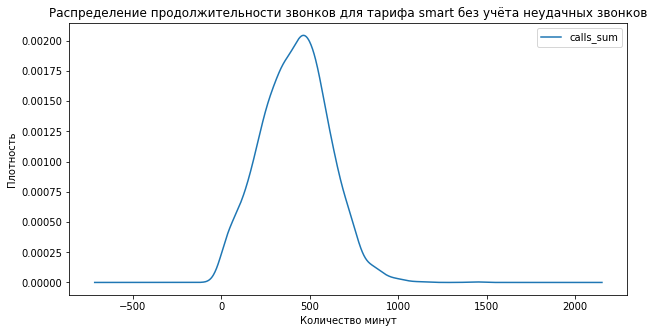

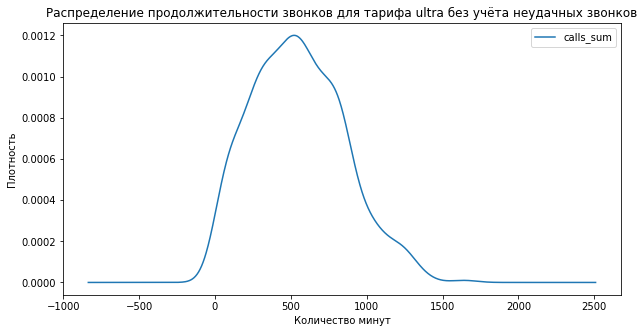

In [121]:
distrib_duration_kde(calls_monthly_stat, 'calls_sum', 'smart')
distrib_duration_kde(calls_monthly_stat, 'calls_sum', 'ultra')

Видим, что распределение длительности звонков похоже на распределние Пуассона: распределение похоже на нормальное с длинным правым хвостом, в котором лежат малочисленные звонки с высокой продолжительностью разговора.

## Этап 4.2. Определение необходимого количества сообщений.

Делать будем всё то же, что делали на этапе 4.1.

Чтобы выяснить среднее необходимое количество минут для пользователя каждого абонента, используем данные из df messages_monthly_stat, в котором собрана информация о суммарном количестве сообщений абонентов в разрезе месяцев 2018 года.

Строим графики и определяем среднее количество сообщений, необходимое абоненту в месяц, с учётом его тарифа.

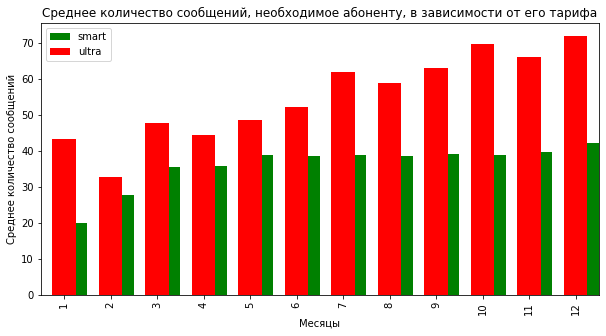

In [92]:
ax = messages_monthly_stat[messages_monthly_stat['tariff_name'] == 'smart']\
.pivot_table(index = 'month', 
values = 'messages_count', aggfunc = 'mean').plot(y = 'messages_count', kind = 'bar', figsize = (10, 5), color = 'g', 
align = 'edge', label = 'smart', title = ('Среднее количество сообщений, необходимое абоненту, в зависимости от его тарифа'))
messages_monthly_stat[messages_monthly_stat['tariff_name'] == 'ultra']\
.pivot_table(index = 'month', values = 'messages_count', 
aggfunc = 'mean').plot(y = 'messages_count', kind = 'bar', figsize = (10, 5), color = 'r', ax = ax, align = 'center', 
label = 'ultra')
plt.xlabel('Месяцы')
plt.ylabel('Среднее количество сообщений')
plt.show()

Как и в случае с минутами, видим, что абонентам с тарифом smart в среднем требуется меньше сообщений, чем абонентам с тарифом ultra.

Чтобы погрузиться в детали, посчитаем соответствующие статистики. Для этого используем ранее написанную функцию.

In [93]:
statistics(messages_monthly_stat, 'messages_count')

,tariff_name,count,mean,std,var,min,max
0,smart,1922,38.72,26.79,717.59,1,143
1,ultra,795,61.16,45.93,2109.66,1,224


Функция позволила узнать, сколько абоненту в среднем требуется сообщений для полноценной жизни в зависимости от его тарифа и месяца: для абонента с тарифом smart - около 40, для абонента с тарифом ultra - около 62. 

Отмечу, что для всех статистик также характерны высокие значения стандартного отклонения, что указывает на разрозненность использованных сообщений от абонента к абоненту: присутствуют как не очень общительные (1 сообщение в месяц), так и гиперобщительные (224 сообщения в месяц) абоненты. 

Напоследок посмотрим на распределение количества в нашем наборе данных. Количество сообщений - дискретная величина, поэтому построим обычную гистограмму распределения.

Вместе с тем отмечу, что для сообщений можно посчитать распределение их количества в зависимости от, например, от абонента, так как для сообщений нет возможности посчитать сумму чего-то, их можно только сосчитать. 

Для этого воспользуемся df messages, присоединив к нему df users, чтобы узнать, какой у абонента тариф. Будем использовать присоединение типа left, чтобы не потерять данные из df mesagess.

Полученный df назовём messages_stats.

In [94]:
messages_stats = messages.merge(users, on = 'user_id', how = 'left')

Проверим корректность присоединения.

In [95]:
messages_stats.head(5)

,id,message_date,user_id,month,age,churn_date,city,first_name,last_name,reg_date,tariff_name,user_status
0,1000_0,2018-06-27,1000,6,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
1,1000_1,2018-10-08,1000,10,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
2,1000_2,2018-08-04,1000,8,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
3,1000_3,2018-06-16,1000,6,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
4,1000_4,2018-12-05,1000,12,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0


Видим, что присоединение осуществлено корректно. Посмотрим распределение переменной.

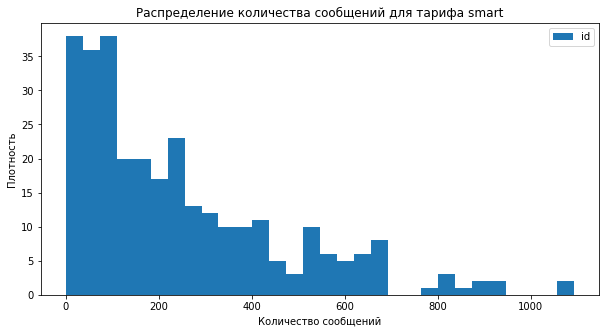

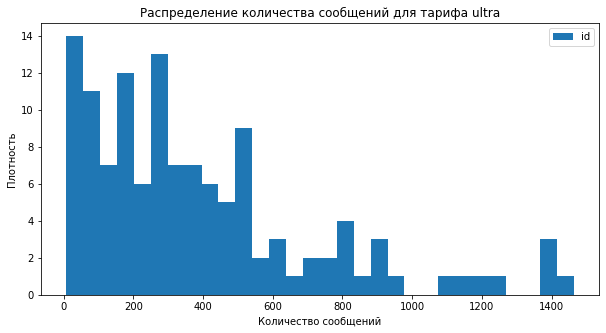

In [96]:
messages_stats[messages_stats['tariff_name'] == 'smart'].pivot_table(index = 'user_id', values = 'id', aggfunc = 'count')\
.plot(y = 'id', kind = 'hist', bins = 30, figsize = (10, 5),
title = ('Распределение количества сообщений для тарифа smart'))
plt.xlabel('Количество сообщений')
plt.ylabel('Плотность')
messages_stats[messages_stats['tariff_name'] == 'ultra'].pivot_table(index = 'user_id', values = 'id', aggfunc = 'count')\
.plot(y = 'id', kind = 'hist', bins = 30, figsize = (10, 5),
title = ('Распределение количества сообщений для тарифа ultra'))
plt.xlabel('Количество сообщений')
plt.ylabel('Плотность')
plt.show()

Для обоих тарифов распределение напоминает пуассоновское с длинным правым хвостом.

## Этап 4.3. Определение необходимого объёма интернет-трафика.

Действуем аналогично этапу 4.1. 

Отмечу, что для в случае с интернет-трафиков в наборе данных имеются нулевые значения в виде, возможно, неудачных интернет-сессий, поэтому будем строить графики и считать статистики с учётом и без учёта нулей (возвращется params).

Сначала присоединим к df internet df users, чтобы узнать, какой у абонента тариф. Будем использовать присоединение типа left, чтобы не потерять данные из df mesagess.

Полученный df назовём internet_stats.

Выясним среднее необходимое количество МБ для абонента для обоих тарифов.

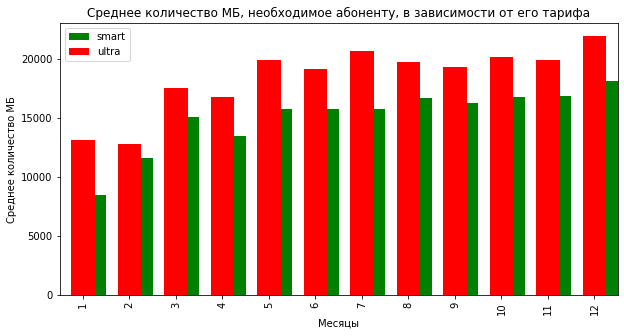

In [97]:
ax = internet_monthly_stat[(internet_monthly_stat['tariff_name'] == 'smart') & (internet_monthly_stat['mb_used_sum'] > 0)]\
.pivot_table(index = 'month', 
values = 'mb_used_sum', aggfunc = 'mean').plot(y = 'mb_used_sum', kind = 'bar', figsize = (10, 5), color = 'g', 
align = 'edge', label = 'smart', title = ('Среднее количество МБ, необходимое абоненту, в зависимости от его тарифа'))
internet_monthly_stat[(internet_monthly_stat['tariff_name'] == 'ultra') & (internet_monthly_stat['mb_used_sum'] > 0)]\
.pivot_table(index = 'month', values = 'mb_used_sum', 
aggfunc = 'mean').plot(y = 'mb_used_sum', kind = 'bar', figsize = (10, 5), color = 'r', ax = ax, align = 'center', 
label = 'ultra')
plt.xlabel('Месяцы')
plt.ylabel('Среднее количество МБ')
plt.show()

Как и в случае с минутами, видим, что абонентам с тарифом smart в среднем требуется меньше МБ, чем абонентам с тарифом ultra.

Чтобы погрузиться в детали, посчитаем соответствующие статистики. Для этого воспользуемся ранее написанной функцией.

In [98]:
statistics(internet_monthly_stat, 'mb_used_sum')

,tariff_name,count,mean,std,var,min,max
0,smart,2227,16243.76,5860.04,34340091.55,202,38610
1,ultra,974,19706.98,9937.13,98746498.93,366,49789


Функция позволила узнать, сколько абоненту в среднем требуется МБ для полноценной жизни в зависимости от его тарифа: для абонента с тарифом smart - около 5900 МБ, для абонента с тарифом ultra - от 9400 МБ. 

Отмечу, что для всех статистик характерны высокие значения стандартного отклонения, что указывает на разрозненность использованных МБ от абонента к абоненту: присутствуют как не очень активные (около 202 МБ в месяц), так и гиперактивные (около 49789 МБ в месяц) абоненты. 

Также было бы интересно посмотреть на средний объём МБ, расходуемый за 1 интернет-сессию. 

Для этого присоединим к df internet df users, чтобы узнать, какой у абонента тариф. Будем использовать присоединение типа left, чтобы не потерять данные из df mesagess.

Полученный df назовём internet_stats.

In [99]:
internet_stats = internet.merge(users, on = 'user_id', how = 'left')

Проверим корректность присоединения.

In [100]:
internet_stats.head(5)

,id,mb_used,session_date,user_id,session_status,month,age,churn_date,city,first_name,last_name,reg_date,tariff_name,user_status
0,1000_0,113,2018-11-25,1000,1,11,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
1,1000_1,1053,2018-09-07,1000,1,9,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
2,1000_2,1198,2018-06-25,1000,1,6,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
3,1000_3,551,2018-08-22,1000,1,8,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
4,1000_4,303,2018-09-24,1000,1,9,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0


Видим, что присоединение осуществлено корректно. Определим среднее количество МБ, расходуемых за 1 интернет-сессию с учётом и без учёта неудачных интернет-сессий.

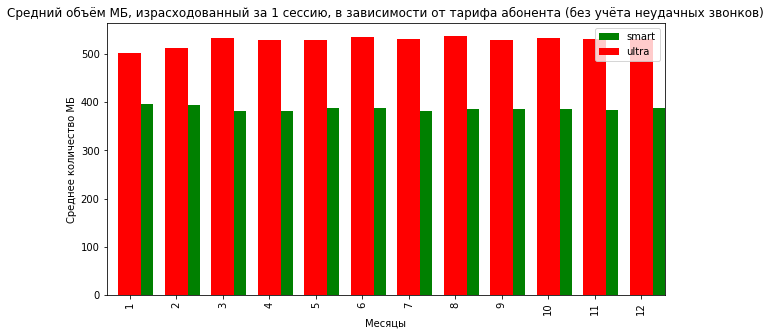

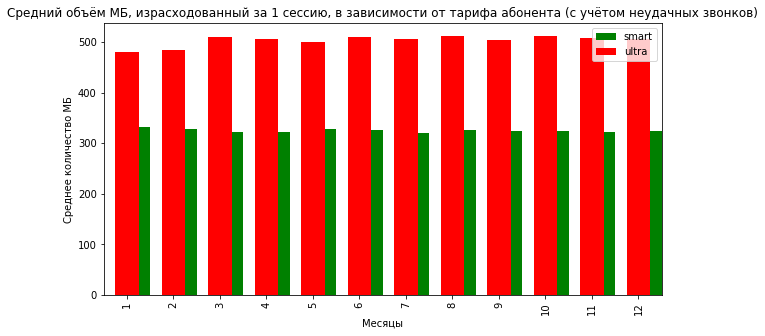

In [101]:
ax = internet_stats[(internet_stats['tariff_name'] == 'smart') & (internet_stats['mb_used'] > 0)]\
.pivot_table(index = 'month', 
values = 'mb_used', aggfunc = 'mean').plot(y = 'mb_used', kind = 'bar', figsize = (10, 5), color = 'g', 
align = 'edge', label = 'smart', 
title = ('Средний объём МБ, израсходованный за 1 сессию, в зависимости от тарифа абонента (без учёта неудачных звонков)'))
internet_stats[(internet_stats['tariff_name'] == 'ultra') & (internet_stats['mb_used'] > 0)]\
.pivot_table(index = 'month', values = 'mb_used', 
aggfunc = 'mean').plot(y = 'mb_used', kind = 'bar', figsize = (10, 5), color = 'r', ax = ax, align = 'center', 
label = 'ultra')
plt.xlabel('Месяцы')
plt.ylabel('Среднее количество МБ')
plt.show()

ax = internet_stats[internet_stats['tariff_name'] == 'smart']\
.pivot_table(index = 'month', 
values = 'mb_used', aggfunc = 'mean').plot(y = 'mb_used', kind = 'bar', figsize = (10, 5), color = 'g', 
align = 'edge', label = 'smart', 
title = ('Средний объём МБ, израсходованный за 1 сессию, в зависимости от тарифа абонента (с учётом неудачных звонков)'))
internet_stats[internet_stats['tariff_name'] == 'ultra']\
.pivot_table(index = 'month', values = 'mb_used', 
aggfunc = 'mean').plot(y = 'mb_used', kind = 'bar', figsize = (10, 5), color = 'r', ax = ax, align = 'center', 
label = 'ultra')
plt.xlabel('Месяцы')
plt.ylabel('Среднее количество МБ')
plt.show()

Видим, что в среднем объём МБ, израсходованных за 1 сессию, абонента с тарифом smart колеблется от 380 до 390 МБ, у абонента с тарифом ultra - от 480 до 520 МБ.

Напоследок посмотрим на распределение количества использованных МБ в нашем наборе данных. Отмечу, что использованные МБ - непрерывная величина, поэтому просто гистограмма для этого не подойдёт. Вместо этого построим график оценки плотности, по виду которого сможем сделать вывод о том, как распределены данные.

Для этого адаптируем соответствующую функцию из этапа 4.1.

In [124]:
def distrib_mb_kde(df, column, tariff):
    df[(df['tariff_name'] == tariff) & (df[column] > 0)].plot(y = column, kind = 'kde', 
    figsize = (10, 5),
    title = ('Распределение объёма использованных МБ для тарифа ' + str(tariff)))
    plt.xlabel('Количество минут')
    plt.ylabel('Плотность')

Функция готова. Построим график оценки плотности для тарифа smart и ultra.

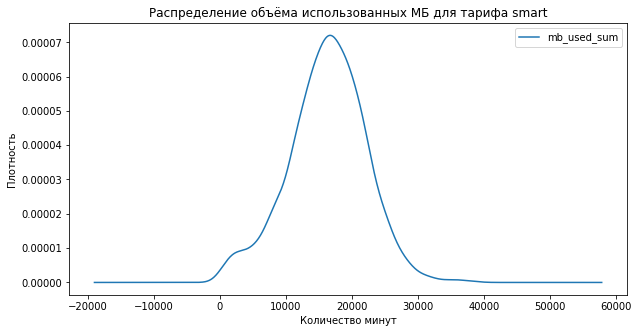

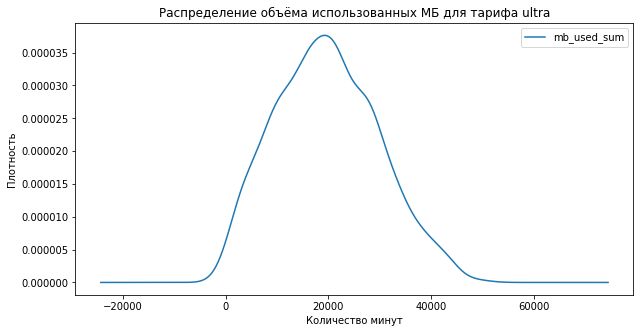

In [126]:
distrib_mb_kde(internet_monthly_stat, 'mb_used_sum', 'smart')
distrib_mb_kde(internet_monthly_stat, 'mb_used_sum', 'ultra')

Видим, что распределение объёма использованных МБ похоже на распределние Пуассона: распределение похоже на нормальное с длинным правым хвостом, в котором лежат малочисленные сессии с высоким объёмом использованных МБ.

# Вывод по этапу 4.

На данном этапе необходимо было определить помесячно необходимые размеры услуг (минуты, сообщения и МБ), для кажой услуги посчитать среднее значение, дисперсию и стандартное отклонение, а также построить гистограммы и описать распределения.

Задания выполнялись преимущественно за счёт написания функций подсчёта статистик и построения гистограмм и графиков. Анализировалось распределение как непрерывных, так и дискретных переменных: в основном все исследуемые переменные имели распределение Пуассона с длинным правым хвостом, в котором собирались редкие абоненты, использующие тариф наиболее интенсивно (долгие звонки, длительные интернет-сессии, большое количество сообщений).

Опытным путём было доказано, что наличие большого количества нулевых значений (неудачный звонок или интернет-сессия) смещают распределение переменной и статистики разброса.

Были определены следующие оптимальные параметры услуг:

- количество минут: для абонента с тарифом smart - около 420, для абонента с тарифом ultra - около 550;


- количество МБ: для абонента с тарифом smart - около 5900 МБ, для абонента с тарифом ultra - от 9400 МБ;


- количество сообщений: для абонента с тарифом smart - около 40, для абонента с тарифом ultra - около 62.


В качестве управленческого решения я бы рекомендовал брать верхнюю или среднюю границу при формировании кампаний продаж.


Вместе с тем, глядя на высокое стандартнное отклонение, можно сказать, что выборки неоднородные, так как в выборке есть как малоактивные (около 7 минут в месяц, 1 сообщение в месяц и около 539 МБ в месяц), так и гиперактивные (около 1485 минут в месяц, 224 сообщения в месяц и около 43893 МБ в месяц) абоненты.

Также было установлено, что:

- средняя продолжительность разговара абонента с тарифом smart колеблется от 6 до 8 минут, у абонента с тарифом ultra - от 8 до 10 минут;


- средний объём МБ, израсходованных за 1 сессию, у абонента с тарифом smart колеблется от 380 до 390 МБ, у абонента с тарифом ultra - от 480 до 520 МБ.

# Этап 5. Построение гипотез и их проверка.

На данном этапе нам необходимо проверить следующие гипотезы:


- средние платежи абонентов тарифов «Ультра» и «Смарт» различаются;

- средние платежи абонентов из Москвы отличаются от средних платежей абонентов из других регионов.

## Этап 5.1. Проверка гипотезы "Средние платежи абонентов тарифов «Ультра» и «Смарт» различаются".

Информация о платежах абонентов находится в df monthly_income. Посмотрим его первые 5 строк.

In [104]:
monthly_income.head(5)

,user_id,month,tariff_name,rub_monthly_fee,calls_monthly_add_income,mb_monthly_add_income,messages_monthly_add_income,total_income
0,1000,5,ultra,1950,0,0,0,1950
1,1000,6,ultra,1950,0,0,0,1950
2,1000,7,ultra,1950,0,0,0,1950
3,1000,8,ultra,1950,0,0,0,1950
4,1000,9,ultra,1950,0,0,0,1950


Для проверки гипотез нам не хватает двух признаков: тариф абонента и город его проживания. Поэтому добавим к этому df df users, в качестве ключа используем поле user_id, тип присоединения - left, так как все строки в df monthly_income должны в нём остаться.

In [105]:
monthly_income = monthly_income.merge(users, on = 'user_id', how = 'left')

Проверим корректность присоединения.

In [106]:
monthly_income.head(5)

,user_id,month,tariff_name_x,rub_monthly_fee,calls_monthly_add_income,mb_monthly_add_income,messages_monthly_add_income,total_income,age,churn_date,city,first_name,last_name,reg_date,tariff_name_y,user_status
0,1000,5,ultra,1950,0,0,0,1950,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
1,1000,6,ultra,1950,0,0,0,1950,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
2,1000,7,ultra,1950,0,0,0,1950,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
3,1000,8,ultra,1950,0,0,0,1950,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
4,1000,9,ultra,1950,0,0,0,1950,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0


Для проверки гипотезы необходимо сформировать 2 среза данных: в 1 будут данные о платежах абонентов с тарифом smart, во втором - с тарифом ultra.

In [107]:
monthly_income_smart = monthly_income.query('tariff_name_x == "smart"')['total_income']
monthly_income_ultra = monthly_income.query('tariff_name_x == "ultra"')['total_income']

Формулируем нулевую гипотезу H0: средние платежи абонентов тарифа smart не отличаются от средних платежей абонентов тарифа ultra.
    
Формулируем альтернативную гипотезу H1: средние платежи абонентов тарифа smart отличаются от средних платежей абонентов тарифа ultra.

Нулевая гипотеза формируется таким образом, чтобы результат проверки был для нас ожидаем и неизменен: если мы проверям отличие между двумя средними, нулевая гипотеза должна быть сформирована таким образом, что различий между средними не должно быть.

Условимся, что будем использовать уровень значимости 0.05 для проверки гипотез.

Теперь необходимо выбрать подходящий критерий проверки гипотезы. Для этого нужно понять, с каким распределением мы имеем дело - нормальным или отличным от нормального.

Чтобы это проверить, воспользуемся normaltest из библиотеки scipy.stats.

Гипотеза H0 - данные в выборке распределены нормально.

Гипотеза H1 - данные в выборке распределены ненормально.

Также для проверки гипотез нужно преобразовать срезы из типа Series в массив Array. Для этого воспользуемся методом .values.

In [108]:
monthly_income_smart = monthly_income_smart.values
monthly_income_ultra = monthly_income_ultra.values

In [109]:
monthly_income_smart

<IntegerArray>
[1350,  550,  550, 1150, 1550,  950,  550, 1350, 1150,  550,
 ...
  550, 1685,  550, 2386, 1950, 1750,  550, 1150, 1513,  598]
Length: 2229, dtype: Int64

In [110]:
monthly_income_ultra

<IntegerArray>
[1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950,
 ...
 1950, 1950, 1950, 1950, 3750, 1950, 2400, 1950, 3300, 1950]
Length: 985, dtype: Int64

Видим, что наши срезы успешно преобразованы в массив целочисленных значений. Можно приступать к проверке гипотезы. 

Проверим, нормально ли распределены данные в monthly_income_smart.

In [111]:
alpha = 0.05
results = st.normaltest(monthly_income_smart)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Нулевая гипотеза опровергнута')
else:
    print('Нулевая гипотеза подтверждена')

p-значение: 3.5831328523562226e-133
Нулевая гипотеза опровергнута


Аналогичную процедуру проведём для monthly_income_ultra.

In [112]:
alpha = 0.05
results = st.normaltest(monthly_income_ultra)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Нулевая гипотеза опровергнута')
else:
    print('Нулевая гипотеза подтверждена')

p-значение: 4.746179665237487e-169
Нулевая гипотеза опровергнута


Проверка гипотез показала, что при заданном уровне значимости распределение данных отличается от нормальных.

Таким образом, мы имеем 2 независимые друг от друга группы, данные в которых не подчиняются нормальному закону распределения. Следовательно, для проверки гипотезы о равенстве или различии средних платежей абонентов разных тарифов используем критерий Манна-Уитни.

In [113]:
alpha = 0.05
results = st.mannwhitneyu(monthly_income_smart, monthly_income_ultra)
print('Среднее значение платежей абонентов тарифа smart:', round(np.mean(monthly_income_smart), 2))
print('Среднее значение платежей абонентов тарифа ultra:', round(np.mean(monthly_income_ultra), 2))
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Нулевая гипотеза опровергнута')
else:
    print('Нулевая гипотеза подтверждена')

Среднее значение платежей абонентов тарифа smart: 1294.64
Среднее значение платежей абонентов тарифа ultra: 2071.07
p-значение: 4.8813241860052426e-186
Нулевая гипотеза опровергнута


Нулевая гипотеза о равенстве средних платежей абонентов тарифа smart и ultra опровергнута, следовательно, средние платежи абонентов тарифов smart и ultra отличаются, что видно также из посчитанных значений средних платажей по каждому тарифу: абоненты с тарифом ultra в среднем платят почти в 2 раза больше, чем абоненты с тарифом smart.

## Этап 5.2. Проверка гипотезы "Средние платежи абонентов из Москвы отличаются от средних платежей абонентов из других регионов".

Как и на прошлом этапе, сначала сделаем 2 среза из df monthly_income: в первом оставим абонентов, проживающих в Москве, во втором - абонентов из других регионов. Затем преобразуем значения поля total_income в массив.

In [114]:
monthly_income_Moskow = monthly_income.query('city == "Москва"')['total_income'].values
monthly_income_not_Moskow = monthly_income.query('city != "Москва"')['total_income'].values

Проверим корректность действий.

In [115]:
monthly_income_Moskow

<IntegerArray>
[1350,  550, 1950, 1950, 1950, 1950, 1950,  550, 1150,  685,
 ...
  950,  550, 1750, 1550,  586,  950,  550, 1750, 1350,  750]
Length: 611, dtype: Int64

In [116]:
monthly_income_not_Moskow

<IntegerArray>
[1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950,  550, 1150,
 ...
  550, 1685,  550, 2386, 1950, 1750,  550, 1150, 1513,  598]
Length: 2603, dtype: Int64

Видим, что преобразования прошли успешно.

Формулируем нулевую гипотезу H0: средние платежи абонентов из Москвы не отличаются от средних платежей абонентов из других регионов.
    
Формулируем альтернативную гипотезу H1: средние платежи абонентов из Москвы отличаются от средних платежей абонентов из других регионов.

Так как в текущих массивах содержатся иные данные, в теории, они могут быть распределены иначе. Поэтому также проверим гипотезу о нормальном распределении данных в массивах.

Сформулируем гипотезы.

Гипотеза H0 - данные в выборке распределены нормально.

Гипотеза H1 - данные в выборке распределены ненормально.

Используем normaltest из библиотеки scipy.stats и проверим распределение данных в monthly_income_Moskow.


In [117]:
alpha = 0.05
results = st.normaltest(monthly_income_Moskow)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Нулевая гипотеза опровергнута')
else:
    print('Нулевая гипотеза подтверждена')

p-значение: 1.5954168769104095e-06
Нулевая гипотеза опровергнута


Аналогичную проверку сделаем для monthly_income_not_Moskow.

In [118]:
alpha = 0.05
results = st.normaltest(monthly_income_not_Moskow)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Нулевая гипотеза опровергнута')
else:
    print('Нулевая гипотеза подтверждена')

p-значение: 2.0334812753767884e-73
Нулевая гипотеза опровергнута


Видим, что нулевые гипотезы опровергнуты и что распределение данных в массиве отлично от нормального, поэтому также используем критерий критерий Манна-Уитни.

In [119]:
alpha = 0.05
results = st.mannwhitneyu(monthly_income_Moskow, monthly_income_not_Moskow)
print('Среднее значение платежей абонентов из Москвы:', round(np.mean(monthly_income_Moskow), 2))
print('Среднее значение платежей абонентов из иных регионов:', round(np.mean(monthly_income_not_Moskow), 2))
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Нулевая гипотеза опровергнута')
else:
    print('Нулевая гипотеза подтверждена')

Среднее значение платежей абонентов из Москвы: 1550.81
Среднее значение платежей абонентов из иных регионов: 1528.32
p-значение: 0.19208767770645735
Нулевая гипотеза подтверждена


Видим, что на заданном уровне значимости нулевая гипотеза не может быть отвергнута: средние платежи абонентов из Москвы не отличаются от средних платежей абонентов из других регионов. Это также видно из рассчитанных значений средних платежей: абоненты из Москвы платят чуть больше, чем абоненты из других регионов, однако в целом разбежка получается небольшой.

# Вывод по этапу 5.

На данном этапе требовалось проверить гипотезы:

- средние платежи абонентов тарифов «Ультра» и «Смарт» различаются;


- средние платежи абонентов из Москвы отличаются от средних платежей абонентов из других регионов.

Сначала были сформированы срезы данных для проверки этих гипотез, затем срезы были преобразованы в массивы с помощью метода values.

Перед выбором статистического критерия, с помощью которого мы бы проверяли гипотезы, необходимо было выяснить, как распределены данные в массивах. Для этого мы сформулировали гипотезы о нормальном или ненормальном распределении данных в массивах и проверили их с помощью normaltest. Это позволило прийти к выводу о том, что данные в массивах не подчиняются нормальному закону распределения.

Так как данные не подчиняются нормальному закону распределения, являются количественными, содержатся в 2 независивых друг от друга группах, было принято решение использовать критерий Манна-Уитни для проверки гипотез.

Нулевая гипотеза о том, что средние платежи абонентов тарифов «Ультра» и «Смарт» не различаются, была отвергнута: абоненты с тарифом ultra в среднем платят почти в 2 раза больше, чем абоненты с тарифом smart.

Нулевая гипотеза о том, что средние платежи абонентов из Москвы не отличаются от средних платежей абонентов из других регионов, была подтверждена: абоненты из Москвы платят чуть больше, чем абоненты из других регионов, однако в целом разбежка получается небольшой.

# Общий вывод по проекту.

В рамках проекта имелись данные компании «Мегалайн» о 500 пользователях и их активности за 2018 год по следующим **направлениям**:

- информация о пользователях;


- информация о звонках;


- информация о сообщениях;


- информация об интернет-сессиях;


- информация о тарифах.

В рамках проекта с помощью исходных данных требовалось рассчитать следующие дополнительные **параметры**:

- количество сделанных звонков и израсходованных минут разговора по месяцам;


- количество отправленных сообщений по месяцам;


- объем израсходованного интернет-трафика по месяцам;


- помесячную выручку с каждого пользователя.


**Целью проекта** являлось определение наиболее рентабельного тарифа из предлагаемых компанией - «Смарт» или «Ультра», а также наиболее значимого с точки зрения формирования дохода региона - Москва или другие регионы.

**Решение**, выработанное в рамках проекта, позволит коммерческому департаменту «Мегалайн» приниять верное управленческое решение о приоритизации эффективного тарифного плана и скорректировать кампании продаж в целях **максимизации прибыли**.

Для этого было необходимо:

1. Ответить на следующие **вопросы:**


- Сколько минут разговора требуется пользователям каждого тарифа в месяц?


- Сколько сообщений требуется пользователям каждого тарифа в месяц?


- Какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?

Также необходимо было посчитать среднее значение, дисперсию и стандартное отклонение для каждого ответа, а также построить гистограммы и описать распределения.

2. Подтвердить или опровергнуть следующие **гипотезы**:


- средние платежи абонентов тарифов «Ультра» и «Смарт» различаются;


- средние платежи абонентов из Москвы отличаются от средних платежей абонентов из других регионов.

В рамках выполнения проекта были выполнены следующие **действия**:

1. Чтение данных, их изучение, поиск аномальных и пропущенных значений в данных.


2. Преобразование типов данных, обработка пропущенных и аномальных значений.


3. Расчёт дополнительных параметров.


4. Анализ данных.


5. Построение гипотез и их проверка.

**Этап 1. Чтение данных, их изучение, поиск аномальных и пропущенных значений в данных.**


В рамках данного этапа были прочитаны предложенные наборы данных, а также произведено их первичное исследование: изучены первые 10 записей в каждом df, получена общая информация о df и информация о его размерах, посчитано количество пропущенных значений в каждом поле df, а также изучены уникальные записи в каждом поле исследуемого df.

Для автоматизации исследовательского процесса была написана соответствующая функция.

В качестве наиболее важных результатов исследования можно отметить:

1. Аномальные значения поля duration в df calls: поле описывает длительность звонка в минутах, и для 39613 звонков их длительность составляет 0 минут. 


2. Аномальные значения поля mb_used в df internet: поле описывает количество МБ, израсходованных за одну интернет-сессию, и для 19598 интернет-сессий количество израсходованных МБ равняется 0. 


3. Пропущенные значения в поле churn_date в df users: поле описывает дату отключения абонента от тарифа, и для 462 абонентов это поле не заполнено. Исходя из семантического смысла поля, можно заключить, что пропуски в этом поле не являются проблемным значением, так как такие абоненты не отключали свои тарифы на момент формирования наборов данных.


4. Данные в полях duration и mb_used в df calls и internet соответственно дают количественную характеристику интенсивности использования абонентами своих тарифов в части звонков и сообщений, при этом даннные в этих полях представлены в виде десятичной дроби (тип данных float). Однако на практике удобнее говорить о таких вещах, когда они сведены к целому значению. Например, абонент за месяц израсходовал 350 минут и 500 МБ интернета, а не 349.78 минут и 499.57 МБ соответственно. Поэтому логичным кажется преобразование этих полей в целочисленное значение с типом данных int.


5. Данные поля call_date в df calls, поля session_date в df internet, поля message_date в df messages, полей churn_date и reg_date в df users приведены в типе str, хотя семантически отражают дату того или иного события. Поэтому их нужно преобразовать в формат datetime.

**Этап 2. Преобразование типов данных, обработка пропущенных и аномальных значений.**


На данном этапе была произведена предварительная обработка данных, которая заключалась в:

- преобразовании типов данных;


- обработке пропущенных значений;


- обработке аномальных значений.

В рамках преобразования типов данных были преобразованы данные в поле duration в df calls и поле mb_used в df internet, поля call_date в df calls, поля session_date в df internet, поля message_date в df messages, полей churn_date и reg_date в df users.

Данные в этих полях описывают длительность звонка в количество израсходованных МБ во время интернет-сессии. Так как корректнее использовать целочисленные значения для измерения этих параметров, они были преобразованы из типа float в тип int, что позволило округлить дробные значения.

Данные поля call_date в df calls, поля session_date в df internet, поля message_date в df messages, полей churn_date и reg_date в df users были преобразованы из типа str в тип datatime за счёт применения соответствующей функции.

В рамках обработки пропущенных значений исследовалось поле churn_date в df users. Это поле описывает дату, когда абонент закрыл свой тариф в компании. Следовательно, если для абонента это поле не заполнено, аботнент ещё не отказался от тарифа и на момент формирования набора данных сотрудничает с компанией, если значение в поле заполнено - абонент закрыл тариф и ушёл в отток. 

Так как нам важно понимать статус абонента - ушедший или действующий - пропуски в поле churn_date не обрабатывались, а на основе поле churn_date было создано поле user_status, которое содержит значение 0, если абонент ещё не закрыл свой тариф, и значение 1, если абонент ушёл в отток. Для этого была написана соответствующая функция.

Были сделаны следующие предположения:

- если поле duration в df calls имеет значение 0, значит, вызов был неудачный: абонент сделал вызов, но собеседник не поднял трубку, следовательно, звонок был совершён, но абонент не потратил минуты;


- если поле mb_used в df internet имеет значение 0, значит, сессия была неудачной: абонент совершил попытку начать интернет-сессию, однако мог столкнуться с какой-либо ошибкой или проблемой (например, находился в месте, где телефон не принимает сигнал вышки), следовательно, сессия была начата, но МБ не были израсходованы.

С учётом этой логики в df были добавлены новые поля: call_status в df calls и session_status в df internet, для этого была написана соответствующая функция. 

В случае если длительность звонка/количество израсходованных МБ равно нулю, в соответствующем поле проставляется отметка о том, что звонок/сессия неудачные, а если длительность звонка/количество израсходованных МБ больше нуля, в соответствующем поле проставляется отметка о том, что звонок/сессия удачные, а данные соответствующим образом маркируются.


**Этап 3. Расчёт дополнительных параметров.**


На данном этапе на основе имеющихся данных были рассчитаны дополнительные параметры:

- количество сделанных звонков и израсходованных минут разговора по месяцам;


- количество отправленных сообщений по месяцам;


- объем израсходованного интернет-трафика по месяцам;


- помесячная выручка.

При расчёте ппомесячной выручки рассчитывались помесячные платежи абонентов за использование абонентами минут, сообщений и МБ интернета, не включённых в их тариф, а также величина абонентской планы, вносимая ежемесячно.

**Этап 4. Анализ данных.**

На данном этапе необходимо было определить помесячно необходимые размеры услуг (минуты, сообщения и МБ), для кажой услуги посчитать среднее значение, дисперсию и стандартное отклонение, а также построить гистограммы и описать распределения.

Задания выполнялись преимущественно за счёт написания функций подсчёта статистик и построения гистограмм и графиков. Анализировалось распределение как непрерывных, так и дискретных переменных: в основном все исследуемые переменные имели распределение Пуассона с длинным правым хвостом, в котором собирались редкие абоненты, использующие тариф наиболее интенсивно (долгие звонки, длительные интернет-сессии, большое количество сообщений).

Опытным путём было доказано, что наличие большого количества нулевых значений (неудачный звонок или интернет-сессия) смещают распределение переменной и статистики разброса.

Были определены следующие оптимальные параметры услуг:

- количество минут: для абонента с тарифом smart - около 420, для абонента с тарифом ultra - около 550;


- количество МБ: для абонента с тарифом smart - около 5900 МБ, для абонента с тарифом ultra - от 9400 МБ;


- количество сообщений: для абонента с тарифом smart - около 40, для абонента с тарифом ultra - около 62.


В качестве управленческого решения я бы рекомендовал брать верхнюю или среднюю границу при формировании кампаний продаж.


Вместе с тем, глядя на высокое стандартнное отклонение, можно сказать, что выборки неоднородные, так как в выборке есть как малоактивные (около 1 минуты в месяц, 1 сообщение в месяц и около 202 МБ в месяц), так и гиперактивные (около 1673 минуты в месяц, 224 сообщения в месяц и около 49789 МБ в месяц) абоненты.

Также было установлено, что:

- средняя продолжительность разговара абонента с тарифом smart колеблется от 6 до 8 минут, у абонента с тарифом ultra - от 8 до 10 минут;


- средний объём МБ, израсходованных за 1 сессию, у абонента с тарифом smart колеблется от 380 до 390 МБ, у абонента с тарифом ultra - от 480 до 520 МБ.

**Этап 5. Построение гипотез и их проверка.**


На данном этапе требовалось проверить гипотезы:

- средние платежи абонентов тарифов «Ультра» и «Смарт» различаются;


- средние платежи абонентов из Москвы отличаются от средних платежей абонентов из других регионов.

Сначала были сформированы срезы данных для проверки этих гипотез, затем срезы были преобразованы в массивы с помощью метода values.

Перед выбором статистического критерия, с помощью которого мы бы проверяли гипотезы, необходимо было выяснить, как распределены данные в массивах. Для этого мы сформулировали гипотезы о нормальном или ненормальном распределении данных в массивах и проверили их с помощью normaltest. Это позволило прийти к выводу о том, что данные в массивах не подчиняются нормальному закону распределения.

Так как данные не подчиняются нормальному закону распределения, являются количественными, содержатся в 2 независивых друг от друга группах, было принято решение использовать критерий Манна-Уитни для проверки гипотез.

Нулевая гипотеза о том, что средние платежи абонентов тарифов «Ультра» и «Смарт» не различаются, была отвергнута: абоненты с тарифом ultra в среднем платят почти в 2 раза больше, чем абоненты с тарифом smart.

Нулевая гипотеза о том, что средние платежи абонентов из Москвы не отличаются от средних платежей абонентов из других регионов, была подтверждена: абоненты из Москвы платят чуть больше, чем абоненты из других регионов, однако в целом разбежка получается небольшой.